# Trabajo Práctico 1 : Reservas de Hotel

# Grupo: GPWin - N° 16

Integrantes:

- DIEM, Walter Gabriel

- MAIOLO, Alejandro

- RUIZ, Karen Belén

## Checkpoint 1

### Exploración Inicial general

Importamos las librerías que vamos a usar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import mahalanobis
from matplotlib.colors import ListedColormap
from sklearn.preprocessing  import  LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from pandas.plotting import scatter_matrix

hotelsTrain = pd.read_csv("./hotels_train.csv")

Hacemos un paneo general de cómo están estructurados los datos

In [2]:
print("(filas, columnas)  = ", hotelsTrain.shape)

(filas, columnas)  =  (61913, 31)


In [3]:
hotelsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [4]:
hotelsTrain.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


Calculamos la cantidad de valores nulos y la relación en porcentaje con el total de los datos

In [5]:
nulls = hotelsTrain.isnull()
nullsStats = pd.DataFrame({"Cantidad de Nulos": nulls.sum(), "Porcentaje de nulos": round(nulls.mean() * 100, 2)})
nullsStats


,Cantidad de Nulos,Porcentaje de nulos
hotel,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00
children,4,0.01


Observamos que las columnas con más valores nulos son agent y company, con company siendo casi totalmente nulo (~95%)

Obtenemos una muestra de 10 filas para observar cómo se ve

In [6]:
hotelsTrain.sample(10)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
30973,City Hotel,43,2017,June,22,3,2,1,2,0.0,...,No Deposit,9.0,NaN,0,Transient-Party,170.0,0,1,a3286207-2213-4b9d-829f-33f108fd296a,0
44335,City Hotel,2,2016,March,14,27,2,2,3,0.0,...,No Deposit,9.0,NaN,0,Transient,147.0,0,2,7fc8cb4b-a0f8-4bbe-9920-5269b3db0833,0
42704,Resort Hotel,468,2016,May,20,12,0,2,2,0.0,...,No Deposit,249.0,NaN,0,Transient-Party,67.0,0,0,e4790682-8859-4687-afe0-56898d9630ca,0
31011,City Hotel,59,2016,February,6,6,2,2,2,0.0,...,No Deposit,1.0,NaN,0,Transient-Party,62.0,0,0,472dcd85-9347-43e2-9fc8-c4ffc8f9622b,0
50673,Resort Hotel,10,2016,October,44,29,1,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,38.0,0,2,a91bc4c0-f2c1-4529-9e49-947d9bd340d9,0
12568,Resort Hotel,0,2016,April,16,14,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,1,ceaf379c-9d5f-4221-bf35-879548abaadd,0
46595,City Hotel,14,2017,February,5,2,0,2,1,0.0,...,No Deposit,NaN,396.0,0,Transient-Party,80.0,0,0,cea5846e-3700-4d09-bc6f-957c3ee09e0b,0
5445,Resort Hotel,33,2017,August,33,18,1,2,2,2.0,...,No Deposit,240.0,NaN,0,Transient-Party,310.0,1,4,77ada326-ed99-4cbf-ac3b-9329a71fee59,0
53209,Resort Hotel,1,2015,November,45,3,0,2,1,0.0,...,No Deposit,NaN,103.0,0,Transient,35.0,0,0,6bce77c4-616f-4c7d-8dc8-2744f46bf9b5,0
38297,Resort Hotel,237,2017,May,18,3,0,1,2,0.0,...,No Deposit,240.0,NaN,0,Transient-Party,92.0,0,0,142b35ab-00ea-4105-8754-75462689cc81,1


### Análisis de tipos (datatypes) de variable

Analizamos los dtypes de las primeras 10 variables (columnas)

In [7]:
first10Vars = hotelsTrain.get( hotelsTrain.columns[0:10] )
first10Vars.dtypes

hotel                         object
lead_time                      int64
arrival_date_year              int64
arrival_date_month            object
arrival_date_week_number       int64
arrival_date_day_of_month      int64
stays_in_weekend_nights        int64
stays_in_week_nights           int64
adults                         int64
children                     float64
dtype: object

Analizamos los dtypes de las 10 segundas variables (columnas)

In [8]:
column_info = hotelsTrain.dtypes.reset_index()
column_info.columns = ['Variable', 'Tipo']  
Segundas_10_variables = column_info.iloc[10:21]
Segundas_10_variables.index.name = "Indice original"
Segundas_10_variables

,Variable,Tipo
Indice original,,
10,babies,int64
11,meal,object
12,country,object
13,market_segment,object
14,distribution_channel,object
15,is_repeated_guest,int64
16,previous_cancellations,int64
17,previous_bookings_not_canceled,int64
18,reserved_room_type,object


Analizamos los dtypes de las últimas 10 variables (columnas)

In [9]:
column_info = hotelsTrain.dtypes.reset_index()
column_info.columns = ['Variable', 'Tipo'] 
ultimas_10_variables = column_info.iloc[-10:]
print(ultimas_10_variables)

                       Variable     Tipo
21                 deposit_type   object
22                        agent  float64
23                      company  float64
24         days_in_waiting_list    int64
25                customer_type   object
26                          adr  float64
27  required_car_parking_spaces    int64
28    total_of_special_requests    int64
29                           id   object
30                  is_canceled    int64


Observamos que hotel y arrival_date_month son de tipo object, esto porque son strings (arrays de caracteres), children es de tipo float y el resto son de tipo int

Vamos  a clasificar estas variables en dos categorías: cuantitativas y cualitativas. Para eso primero hago un análisis de sus datos

In [10]:
dtypeAnalysisFirst10 = pd.DataFrame(columns=["Variable", "Cantidad de valores diferentes", "dtype", "Tipo"])
for i in range(0,10):
    columnName = hotelsTrain.columns[i]
    valueCounts = first10Vars.get(columnName).value_counts()
    numberOfDifferentValues = len(valueCounts)
    dtype = first10Vars.get(columnName).dtype
    dtypeAnalysisFirst10.loc[len(dtypeAnalysisFirst10.index)] = [columnName, numberOfDifferentValues, dtype, None]

dtypeAnalysisFirst10

,Variable,Cantidad de valores diferentes,dtype,Tipo
0,hotel,2,object,None
1,lead_time,472,int64,None
2,arrival_date_year,3,int64,None
3,arrival_date_month,12,object,None
4,arrival_date_week_number,53,int64,None
5,arrival_date_day_of_month,31,int64,None
6,stays_in_weekend_nights,13,int64,None
7,stays_in_week_nights,27,int64,None
8,adults,13,int64,None
9,children,5,float64,None


Agregamos etiquetas  "categórica" y "cuantitativa" en el dataframe de las primeras 10 variables. 

In [11]:
def changeTipo(df, variable, tipo):
    df.loc[df["Variable"] == variable, "Tipo"] = tipo
    return df

dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "hotel", "categorica")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "lead_time", "cuantitativa")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "arrival_date_year", "cuantitativa")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "arrival_date_month", "categorica")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "arrival_date_week_number", "cuantitativa")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "arrival_date_day_of_month", "cuantitativa")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "stays_in_weekend_nights", "cuantitativa")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "stays_in_week_nights", "cuantitativa")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "adults", "cuantitativa")
dtypeAnalysisFirst10 = changeTipo(dtypeAnalysisFirst10, "children", "cuantitativa")
dtypeAnalysisFirst10

,Variable,Cantidad de valores diferentes,dtype,Tipo
0,hotel,2,object,categorica
1,lead_time,472,int64,cuantitativa
2,arrival_date_year,3,int64,cuantitativa
3,arrival_date_month,12,object,categorica
4,arrival_date_week_number,53,int64,cuantitativa
5,arrival_date_day_of_month,31,int64,cuantitativa
6,stays_in_weekend_nights,13,int64,cuantitativa
7,stays_in_week_nights,27,int64,cuantitativa
8,adults,13,int64,cuantitativa
9,children,5,float64,cuantitativa


Procedemos con la clasificacion de las segundas 10 variables de forma análoga al caso previo.

In [12]:
Segundas10Vars = hotelsTrain.get( hotelsTrain.columns[10:21] )
dtypeAnalysisSecond10 = pd.DataFrame(columns=["Variable", "Cantidad de valores diferentes", "dtype", "Tipo"])


In [13]:
for i in range(10,21):
    columnName = hotelsTrain.columns[i]
    valueCounts = Segundas10Vars.get(columnName).value_counts()
    numberOfDifferentValues = len(valueCounts)
    dtype = Segundas10Vars.get(columnName).dtype
    dtypeAnalysisSecond10.loc[i-10] = [columnName, numberOfDifferentValues, dtype, None]


dtypeAnalysisSecond10

,Variable,Cantidad de valores diferentes,dtype,Tipo
0,babies,4,int64,None
1,meal,5,object,None
2,country,149,object,None
3,market_segment,8,object,None
4,distribution_channel,5,object,None
5,is_repeated_guest,2,int64,None
6,previous_cancellations,15,int64,None
7,previous_bookings_not_canceled,51,int64,None
8,reserved_room_type,10,object,None
9,assigned_room_type,12,object,None


Analizamos la cantidad de datos de las últimas 10 variables para categorizarlas

In [14]:
last10Vars = hotelsTrain.get( hotelsTrain.columns[21:31] )
dtypeAnalysisLast10 = pd.DataFrame(columns=["Variable", "Cantidad de valores diferentes", "dtype", "Tipo"])
for i in range(21,31):
    columnName = hotelsTrain.columns[i]
    valueCounts = last10Vars.get(columnName).value_counts()
    numberOfDifferentValues = len(valueCounts)
    dtype = last10Vars.get(columnName).dtype
    dtypeAnalysisLast10.loc[i-10] = [columnName, numberOfDifferentValues, dtype, None]
dtypeAnalysisLast10

,Variable,Cantidad de valores diferentes,dtype,Tipo
11,deposit_type,3,object,None
12,agent,296,float64,None
13,company,276,float64,None
14,days_in_waiting_list,116,int64,None
15,customer_type,4,object,None
16,adr,6147,float64,None
17,required_car_parking_spaces,5,int64,None
18,total_of_special_requests,6,int64,None
19,id,61913,object,None
20,is_canceled,2,int64,None


In [15]:
def changeTipo(df, variable, tipo):
    df.loc[df["Variable"] == variable, "Tipo"] = tipo
    return df

dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "babies", "cuantitativa")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "meal", "categorica")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "country", "categorica")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "market_segment", "categorica")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "distribution_channel", "categorica")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "is_repeated_guest", "categorica")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "previous_cancellations", "cuantitativa")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "previous_bookings_not_canceled", "cuantitativa")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "reserved_room_type", "categorica")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "assigned_room_type", "categorica")
dtypeAnalysisSecond10 = changeTipo(dtypeAnalysisSecond10, "booking_changes", "cuantitativa")
dtypeAnalysisSecond10

,Variable,Cantidad de valores diferentes,dtype,Tipo
0,babies,4,int64,cuantitativa
1,meal,5,object,categorica
2,country,149,object,categorica
3,market_segment,8,object,categorica
4,distribution_channel,5,object,categorica
5,is_repeated_guest,2,int64,categorica
6,previous_cancellations,15,int64,cuantitativa
7,previous_bookings_not_canceled,51,int64,cuantitativa
8,reserved_room_type,10,object,categorica
9,assigned_room_type,12,object,categorica


Clasificamos las últimas 10 variables entre "cuantitativa" y "categórica" (cualitativa)

Notamos que en su mayoría las varaiables con tipo numérico son cuantitativas, a excepción de deposit_type, customer_type y id, ya que tienen pocos valores y son indicativos. En el caso del id, no es numérico porque el id es único para cada individuo, no indica una cantidad numérica.

In [16]:
def changeTipo(df, variable, tipo):
    df.loc[df["Variable"] == variable, "Tipo"] = tipo
    return df

dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "deposit_type", "categorica")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "agent", "categorica")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "company", "categorica")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "days_in_waiting_list", "cuantitativa")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "customer_type", "categorica")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "adr", "cuantitativa")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, " required_car_parking_spaces", "cuantitativa")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "total_of_special_requests", "cuantitativa")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "id", "categorica")
dtypeAnalysisLast10 = changeTipo(dtypeAnalysisLast10, "is_canceled", "categorica")
dtypeAnalysisLast10

,Variable,Cantidad de valores diferentes,dtype,Tipo
11,deposit_type,3,object,categorica
12,agent,296,float64,categorica
13,company,276,float64,categorica
14,days_in_waiting_list,116,int64,cuantitativa
15,customer_type,4,object,categorica
16,adr,6147,float64,cuantitativa
17,required_car_parking_spaces,5,int64,None
18,total_of_special_requests,6,int64,cuantitativa
19,id,61913,object,categorica
20,is_canceled,2,int64,categorica


### Análisis de variables cuantitativas

De las primeras 10 variables tenemos 8 que son cuantitativas

In [17]:
first8QuantList = dtypeAnalysisFirst10.loc[dtypeAnalysisFirst10["Tipo"] == "cuantitativa"].Variable
first8QuantList

1                    lead_time
2            arrival_date_year
4     arrival_date_week_number
5    arrival_date_day_of_month
6      stays_in_weekend_nights
7         stays_in_week_nights
8                       adults
9                     children
Name: Variable, dtype: object

Nos detenemos en la variable children, nos llama la atención que su dtype sea float, siendo que una persona tiene una cantidad entera de hijos, analizamos ese punto:

In [18]:
summaryVars = first10Vars.get(first8QuantList)
summaryVars.children.value_counts()

0.0     57457
1.0      2457
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

Sólo toma valores enteros así que en un pre-procesamiento se podría cambiar el tipo de variable.

Calculamos las medidas de resumen para estas 8

In [19]:
summaryVars = first10Vars.get(first8QuantList)
summaryDf = pd.DataFrame({
    "Media": round(summaryVars.mean(), 3),
    "Moda": summaryVars.mode().iloc[0],
    "Mediana": summaryVars.median(),
    "Desv. Estándar": round(summaryVars.std(), 3),
    "Varianza": round(summaryVars.var(), 3),
    "Sesgo": round(summaryVars.skew(), 3),
    "1-cuartil": round(summaryVars.quantile(0.25), 3),
    "2-cuartil": round(summaryVars.quantile(0.50), 3),
    "3-cuartil": round(summaryVars.quantile(0.75), 3),
    "4-cuartil": round(summaryVars.quantile(1), 3)
    })
summaryDf

,Media,Moda,Mediana,Desv. Estándar,Varianza,Sesgo,1-cuartil,2-cuartil,3-cuartil,4-cuartil
lead_time,112.248,0.0,78.0,110.718,12258.465,1.271,23.0,78.0,172.0,629.0
arrival_date_year,2016.155,2016.0,2016.0,0.708,0.502,-0.230,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,27.218,33.0,28.0,13.526,182.953,-0.015,16.0,28.0,38.0,53.0
arrival_date_day_of_month,15.786,17.0,16.0,8.795,77.361,0.001,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.924,0.0,1.0,0.993,0.986,1.239,0.0,1.0,2.0,16.0
stays_in_week_nights,2.510,2.0,2.0,1.885,3.553,2.628,1.0,2.0,3.0,40.0
adults,1.863,2.0,2.0,0.589,0.347,21.066,2.0,2.0,2.0,55.0
children,0.105,0.0,0.0,0.403,0.162,4.180,0.0,0.0,0.0,10.0


Analizamos de las segundas 10 variables cuantitativas (10 columnas intermedias)

In [20]:
Second3QuantList = dtypeAnalysisSecond10.loc[dtypeAnalysisSecond10["Tipo"] == "cuantitativa"].Variable
Second3QuantList

0                             babies
6             previous_cancellations
7     previous_bookings_not_canceled
10                   booking_changes
Name: Variable, dtype: object

In [21]:
summarySecondVars = Segundas10Vars.get(Second3QuantList)
summarySecondDf = pd.DataFrame({
    "Media": round(summarySecondVars.mean(), 3),
    "Moda": summarySecondVars.mode().iloc[0],
    "Mediana": summarySecondVars.median(),
    "Desv. Estándar": round(summarySecondVars.std(), 3),
    "Varianza": round(summarySecondVars.var(), 3),
    "Sesgo": round(summarySecondVars.skew(), 3),
    "1-cuartil": round(summarySecondVars.quantile(0.25), 3),
    "2-cuartil": round(summarySecondVars.quantile(0.50), 3),
    "3-cuartil": round(summarySecondVars.quantile(0.75), 3),
    "4-cuartil": round(summarySecondVars.quantile(1), 3)
    })
summarySecondDf

,Media,Moda,Mediana,Desv. Estándar,Varianza,Sesgo,1-cuartil,2-cuartil,3-cuartil,4-cuartil
babies,0.007,0,0.0,0.092,0.008,24.633,0.0,0.0,0.0,9.0
previous_cancellations,0.115,0,0.0,0.994,0.987,21.146,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,0.115,0,0.0,1.396,1.950,25.558,0.0,0.0,0.0,70.0
booking_changes,0.196,0,0.0,0.611,0.373,5.699,0.0,0.0,0.0,17.0


Filtramos las últimas 10 variables por cuantitativas

In [22]:
LastQuantList = dtypeAnalysisLast10.loc[dtypeAnalysisLast10["Tipo"] == "cuantitativa"].Variable
LastQuantList

14         days_in_waiting_list
16                          adr
18    total_of_special_requests
Name: Variable, dtype: object

Calculamos las medidas de resumen

In [23]:
summaryLastVars = last10Vars.get(LastQuantList)
summaryLastDf = pd.DataFrame({
    "Media": round(summaryLastVars.mean(), 3),
    "Moda": summaryLastVars.mode().iloc[0],
    "Mediana": summaryLastVars.median(),
    "Desv. Estándar": round(summaryLastVars.std(), 3),
    "Varianza": round(summaryLastVars.var(), 3),
    "Sesgo": round(summaryLastVars.skew(), 3),
    "1-cuartil": round(summaryLastVars.quantile(0.25), 3),
    "2-cuartil": round(summaryLastVars.quantile(0.50), 3),
    "3-cuartil": round(summaryLastVars.quantile(0.75), 3),
    "4-cuartil": round(summaryLastVars.quantile(1), 3)
    })
summaryLastDf

,Media,Moda,Mediana,Desv. Estándar,Varianza,Sesgo,1-cuartil,2-cuartil,3-cuartil,4-cuartil
days_in_waiting_list,2.639,0.0,0.0,18.619,346.671,11.372,0.0,0.0,0.0,391.0
adr,102.384,62.0,95.0,47.758,2280.792,1.052,70.0,95.0,126.0,510.0
total_of_special_requests,0.524,0.0,0.0,0.775,0.601,1.466,0.0,0.0,1.0,5.0


### Análisis de variables cualitativas

De las primeras 10 variables hay 2 que son cualitativas

In [24]:
first2QualList = dtypeAnalysisFirst10.loc[dtypeAnalysisFirst10["Tipo"] == "categorica"].Variable
first2QualList

0                 hotel
3    arrival_date_month
Name: Variable, dtype: object

Analizamos los valores y sus frecuencias. Primero para hotel, recuerdo la cantidad de nulos

In [25]:
nullsStats.loc["hotel"]

Cantidad de Nulos      0.0
Porcentaje de nulos    0.0
Name: hotel, dtype: float64

Como no tiene nulos uso los datos directamente

In [26]:
summaryVars = first10Vars.get(first2QualList)
hotelFrequency = summaryVars.hotel.value_counts().reset_index()
hotelFrequency.columns = ["Hotel nombre", "Frecuencia absoluta"]
hotelFrequency["Frecuencia relativa [%]"] = round(hotelFrequency["Frecuencia absoluta"]*100/len(summaryVars.hotel), 2)
hotelFrequency

,Hotel nombre,Frecuencia absoluta,Frecuencia relativa [%]
0,City Hotel,42129,68.05
1,Resort Hotel,19784,31.95


Ahora analizamos arrival_date_month

In [27]:
nullsStats.loc["arrival_date_month"]

Cantidad de Nulos      0.0
Porcentaje de nulos    0.0
Name: arrival_date_month, dtype: float64

In [28]:
arrivalMonthsFrequency = summaryVars.arrival_date_month.value_counts().reset_index()
arrivalMonthsFrequency.columns = ["Mes", "Frecuencia absoluta"]
arrivalMonthsFrequency["Frecuencia relativa [%]"] = round(arrivalMonthsFrequency["Frecuencia absoluta"]*100/len(summaryVars.hotel), 2)
arrivalMonthsFrequency

,Mes,Frecuencia absoluta,Frecuencia relativa [%]
0,August,7176,11.59
1,July,6524,10.54
2,May,6159,9.95
3,April,5878,9.49
4,October,5863,9.47
5,June,5772,9.32
6,September,5619,9.08
7,March,4899,7.91
8,February,4125,6.66
9,December,3493,5.64


Analizamos las variables cualitativas de las 10 columnas centrales.

In [29]:
Second3QualList = dtypeAnalysisSecond10.loc[dtypeAnalysisSecond10["Tipo"] == "categorica"].Variable
Second3QualList

1                    meal
2                 country
3          market_segment
4    distribution_channel
5       is_repeated_guest
8      reserved_room_type
9      assigned_room_type
Name: Variable, dtype: object

Primero analizamos la cantidad de nulos en cada columna:

In [30]:
summaryVars = Segundas10Vars.get(Second3QualList)
valores_nulos_por_columna = summaryVars.isnull().sum()

print(valores_nulos_por_columna)


meal                      0
country                 221
market_segment            0
distribution_channel      0
is_repeated_guest         0
reserved_room_type        0
assigned_room_type        0
dtype: int64


Como se observa, la unica variable con valores nulos es "Country". 

Procedemos a analizar la frecuencia del lote.

Variable comida contratada, columna  "Meal":

In [31]:
summaryVars = Segundas10Vars.get(Second3QualList)
mealFrequency = summaryVars.meal.value_counts().reset_index()
mealFrequency.columns = ["Tipo de Comida", "Frecuencia absoluta"]
mealFrequency["Frecuencia relativa [%]"] = round(mealFrequency["Frecuencia absoluta"]*100/len(summaryVars.meal), 2)
mealFrequency

,Tipo de Comida,Frecuencia absoluta,Frecuencia relativa [%]
0,BB,47837,77.26
1,HB,7452,12.04
2,SC,5556,8.97
3,Undefined,591,0.95
4,FB,477,0.77


Observamos como particularidad una categoria "indefinida", la cual en un analisis posterior podria ser eliminada del data set.

Variable segmento de mercado, columna  "market_segment":

In [32]:
summaryVars = Segundas10Vars.get(Second3QualList)
mSegmentFrequency = summaryVars.market_segment.value_counts().reset_index()
mSegmentFrequency.columns = ["Segmento de mercado", "Frecuencia absoluta"]
mSegmentFrequency["Frecuencia relativa [%]"] = round(mSegmentFrequency["Frecuencia absoluta"]*100/len(summaryVars.market_segment), 2)
mSegmentFrequency

,Segmento de mercado,Frecuencia absoluta,Frecuencia relativa [%]
0,Online TA,29269,47.27
1,Offline TA/TO,12384,20.00
2,Groups,11545,18.65
3,Direct,5757,9.30
4,Corporate,2484,4.01
5,Complementary,359,0.58
6,Aviation,113,0.18
7,Undefined,2,0.00


Al igual, que en el caso anterior, la categoria "indefinida", practicamente no tiene impacto debido a la cantidad absoluta y podria eliminarse del data set

Variable canal de venta, columna  "distribution_channel":

In [33]:
summaryVars = Segundas10Vars.get(Second3QualList)
dChannelFrequency = summaryVars.distribution_channel.value_counts().reset_index()
dChannelFrequency.columns = ["Canal de venta", "Frecuencia absoluta"]
dChannelFrequency["Frecuencia relativa [%]"] = round(dChannelFrequency["Frecuencia absoluta"]*100/len(summaryVars.distribution_channel), 2)
dChannelFrequency

,Canal de venta,Frecuencia absoluta,Frecuencia relativa [%]
0,TA/TO,51849,83.74
1,Direct,6799,10.98
2,Corporate,3172,5.12
3,GDS,89,0.14
4,Undefined,4,0.01


Variable cliente frecuente, columna  "is_repeated_guest":

In [34]:
summaryVars = Segundas10Vars.get(Second3QualList)
repeatedGuestFrequency = summaryVars.is_repeated_guest.value_counts().reset_index()
repeatedGuestFrequency.columns = ["Cliente Frencuente", "Frecuencia absoluta"]
repeatedGuestFrequency["Frecuencia relativa [%]"] = round(repeatedGuestFrequency["Frecuencia absoluta"]*100/len(summaryVars.is_repeated_guest), 2)
repeatedGuestFrequency

,Cliente Frencuente,Frecuencia absoluta,Frecuencia relativa [%]
0,0,60180,97.2
1,1,1733,2.8


Si bien esta variable utiliza un formato int64, corresponde a una categoria dicotomica, por lo que podriamos asignarle un tipo booleano que identifica mejor su funcion en el deminio del problema.

Variable Tipo de habitacion reservada, columna  "reserved_room_type":

In [35]:
summaryVars = Segundas10Vars.get(Second3QualList)
rRoomTypeFrequency = summaryVars.reserved_room_type.value_counts().reset_index()
rRoomTypeFrequency.columns = ["Tipo habitacion reservada", "Frecuencia absoluta"]
rRoomTypeFrequency["Frecuencia relativa [%]"] = round(rRoomTypeFrequency["Frecuencia absoluta"]*100/len(summaryVars.reserved_room_type), 2)
rRoomTypeFrequency

,Tipo habitacion reservada,Frecuencia absoluta,Frecuencia relativa [%]
0,A,45134,72.90
1,D,9585,15.48
2,E,3249,5.25
3,F,1451,2.34
4,G,1090,1.76
5,B,580,0.94
6,C,482,0.78
7,H,334,0.54
8,P,7,0.01
9,L,1,0.00


Variable Tipo de habitacion asignada, columna  "assigned_room_type":

In [36]:
summaryVars = Segundas10Vars.get(Second3QualList)
aRoomTypeFrequency = summaryVars.assigned_room_type.value_counts().reset_index()
aRoomTypeFrequency.columns = ["Tipo habitacion asignada", "Frecuencia absoluta"]
aRoomTypeFrequency["Frecuencia relativa [%]"] = round(aRoomTypeFrequency["Frecuencia absoluta"]*100/len(summaryVars.assigned_room_type), 2)
aRoomTypeFrequency

,Tipo habitacion asignada,Frecuencia absoluta,Frecuencia relativa [%]
0,A,40007,64.62
1,D,12190,19.69
2,E,3779,6.10
3,F,1821,2.94
4,G,1277,2.06
5,C,1127,1.82
6,B,1056,1.71
7,H,384,0.62
8,I,145,0.23
9,K,119,0.19


Variable Pais, columna  "country":

In [37]:
summaryVars = Segundas10Vars.get(Second3QualList)
countryFrequency = summaryVars.country.value_counts().reset_index()
countryFrequency.columns = ["Pais", "Frecuencia absoluta"]
countryFrequency["Frecuencia relativa [%]"] = round(countryFrequency["Frecuencia absoluta"]*100/len(summaryVars.country), 2)
countryFrequency

,Pais,Frecuencia absoluta,Frecuencia relativa [%]
0,PRT,27950,45.14
1,GBR,5733,9.26
2,FRA,4809,7.77
3,ESP,4210,6.80
4,DEU,3312,5.35
...,...,...,...
144,HND,1,0.00
145,FJI,1,0.00
146,LIE,1,0.00
147,ATA,1,0.00


Analizamos las variables cualitativas de las 10 últimas columnas.

In [38]:
lastQualList = dtypeAnalysisLast10.loc[dtypeAnalysisLast10["Tipo"] == "categorica"].Variable
lastQualList

11     deposit_type
12            agent
13          company
15    customer_type
19               id
20      is_canceled
Name: Variable, dtype: object

Verificamos la cantidad de nulos en deposit_type

In [39]:
nullsStats.loc["deposit_type"]

Cantidad de Nulos      0.0
Porcentaje de nulos    0.0
Name: deposit_type, dtype: float64

No contiene nulos, podemos continuar usando los datos directamente

In [40]:
summaryVars = last10Vars.get(lastQualList)
depositTypeFrequency = summaryVars.deposit_type.value_counts().reset_index()
depositTypeFrequency.columns = ["Nombre del depósito", "Frecuencia absoluta"]
depositTypeFrequency["Frecuencia relativa [%]"] = round(depositTypeFrequency["Frecuencia absoluta"]*100/len(summaryVars.deposit_type), 2)
depositTypeFrequency

,Nombre del depósito,Frecuencia absoluta,Frecuencia relativa [%]
0,No Deposit,51685,83.48
1,Non Refund,10150,16.39
2,Refundable,78,0.13


Ahora analizamos agent

In [41]:
nullsStats.loc["agent"]

Cantidad de Nulos      7890.00
Porcentaje de nulos      12.74
Name: agent, dtype: float64

In [42]:
# Calcular la frecuencia absoluta de la variable "agent" y reiniciar los índices
agentFrequency = summaryVars.agent.dropna().value_counts().reset_index()

# Renombrar las columnas
agentFrequency.columns = ["Nombre del agente", "Frecuencia absoluta"]

# Calcular la frecuencia relativa en porcentaje
agentFrequency["Frecuencia relativa [%]"] = round(agentFrequency["Frecuencia absoluta"] * 100 / len(summaryVars['agent'].dropna()), 2)

# Mostrar el resultado
agentFrequency


,Nombre del agente,Frecuencia absoluta,Frecuencia relativa [%]
0,9.0,17004,31.48
1,240.0,7386,13.67
2,1.0,4424,8.19
3,14.0,1700,3.15
4,6.0,1639,3.03
...,...,...,...
291,420.0,1,0.00
292,352.0,1,0.00
293,450.0,1,0.00
294,283.0,1,0.00


In [43]:
nullsStats.loc["company"]

Cantidad de Nulos      58761.00
Porcentaje de nulos       94.91
Name: company, dtype: float64

In [44]:
# Calcular la frecuencia absoluta de la variable "company" y reiniciar los índices
companyFrequency = summaryVars.company.dropna().value_counts().reset_index()

# Renombrar las columnas
companyFrequency.columns = ["Nombre del company", "Frecuencia absoluta"]

# Calcular la frecuencia relativa en porcentaje
companyFrequency["Frecuencia relativa [%]"] = round(companyFrequency["Frecuencia absoluta"] * 100 / len(summaryVars['company'].dropna()), 2)

# Mostrar el resultado
companyFrequency

,Nombre del company,Frecuencia absoluta,Frecuencia relativa [%]
0,40.0,390,12.37
1,223.0,364,11.55
2,67.0,169,5.36
3,45.0,118,3.74
4,153.0,106,3.36
...,...,...,...
271,305.0,1,0.03
272,275.0,1,0.03
273,461.0,1,0.03
274,220.0,1,0.03


In [45]:
# Calcular la frecuencia absoluta de la variable "customerType" y reiniciar los índices
customerTypeFrequency = summaryVars.customer_type.dropna().value_counts().reset_index()

# Renombrar las columnas
customerTypeFrequency.columns = ["Nombre del customer_type", "Frecuencia absoluta"]

# Calcular la frecuencia relativa en porcentaje
customerTypeFrequency["Frecuencia relativa [%]"] = round(customerTypeFrequency["Frecuencia absoluta"] * 100 / len(summaryVars['customer_type'].dropna()), 2)

# Mostrar el resultado
customerTypeFrequency

,Nombre del customer_type,Frecuencia absoluta,Frecuencia relativa [%]
0,Transient,47449,76.64
1,Transient-Party,12168,19.65
2,Contract,2033,3.28
3,Group,263,0.42


In [46]:
nullsStats.loc["is_canceled"]

Cantidad de Nulos      0.0
Porcentaje de nulos    0.0
Name: is_canceled, dtype: float64

In [47]:
# Calcular la frecuencia absoluta de la variable "customerType" y reiniciar los índices
isCanceledFrequency = summaryVars.is_canceled.dropna().value_counts().reset_index()

# Renombrar las columnas
isCanceledFrequency.columns = ["Nombre del is_canceled", "Frecuencia absoluta"]

# Calcular la frecuencia relativa en porcentaje
isCanceledFrequency["Frecuencia relativa [%]"] = round(isCanceledFrequency["Frecuencia absoluta"] * 100 / len(summaryVars['is_canceled'].dropna()), 2)

# Mostrar el resultado
isCanceledFrequency

,Nombre del is_canceled,Frecuencia absoluta,Frecuencia relativa [%]
0,0,30972,50.03
1,1,30941,49.97


### Variables irrelevantes

Consideramos que hay dos variables que son irrelevantes para realizar una predicción de cancelación de reserva. Ellas son:

-  company: debido a que tiene un ~95% de datos nulos, lo cual implica un aporte de información muy bajo incluso para realizarle una imputación de datos.

- id: como sólo es utilizada para distinguir una fila del dataset de otra, no aporta información al análisis.

### Gráficos de distribuciones

Analizamos los gráficos de distribución para las primeras 10 variables

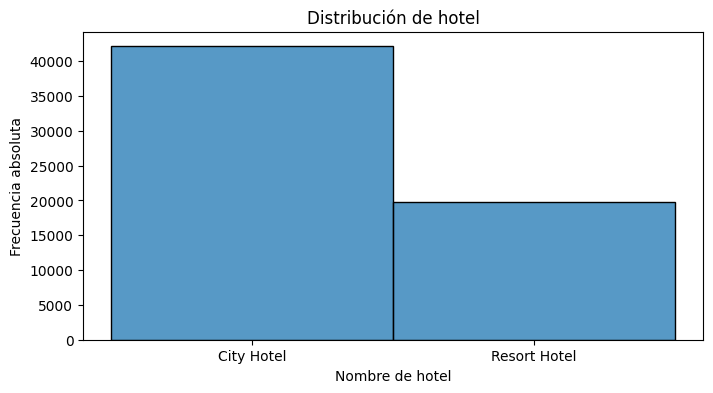

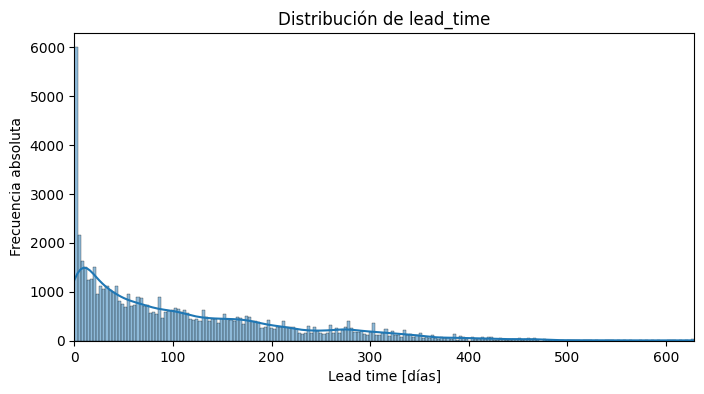

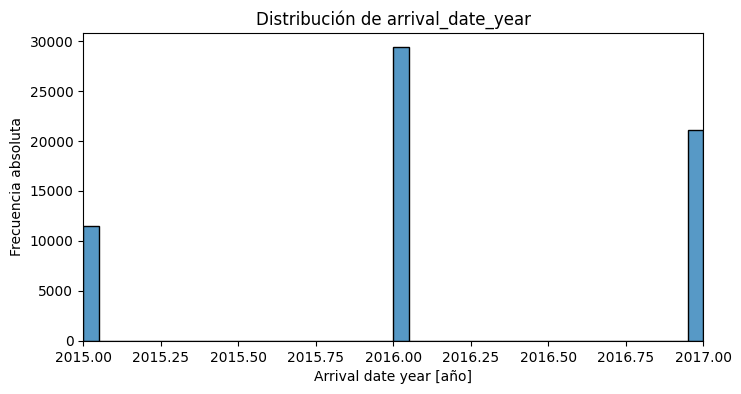

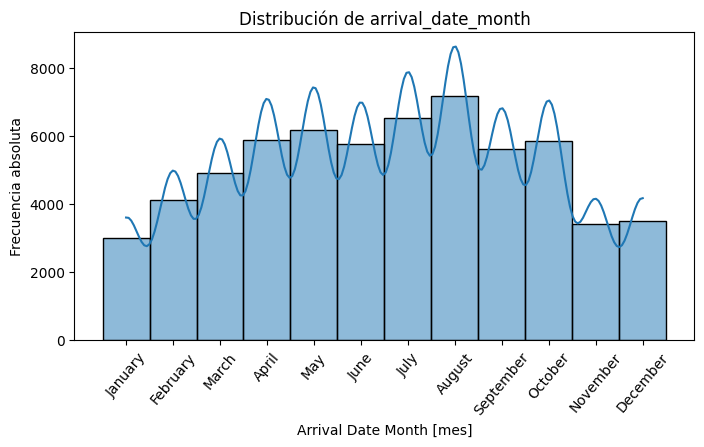

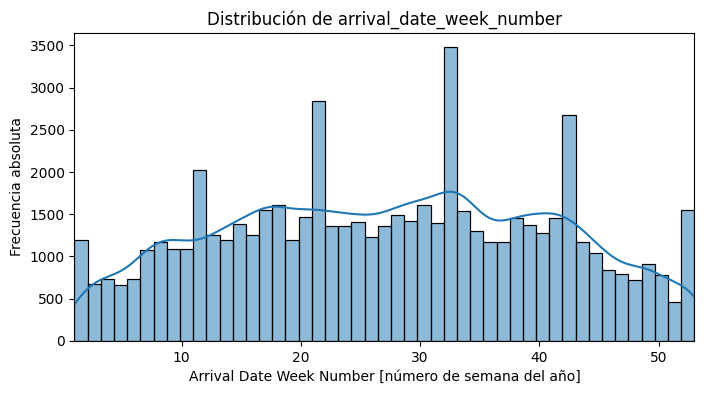

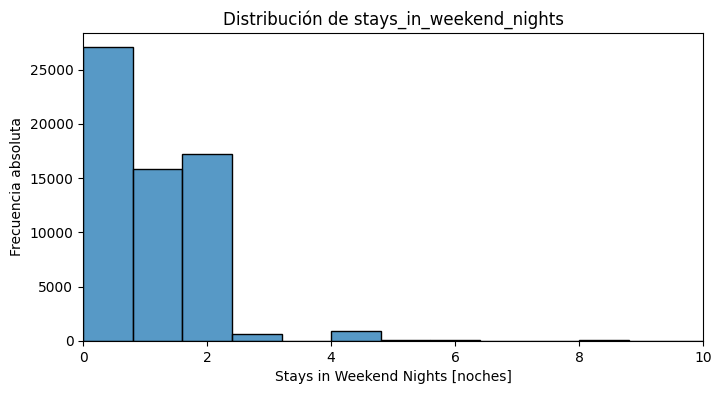

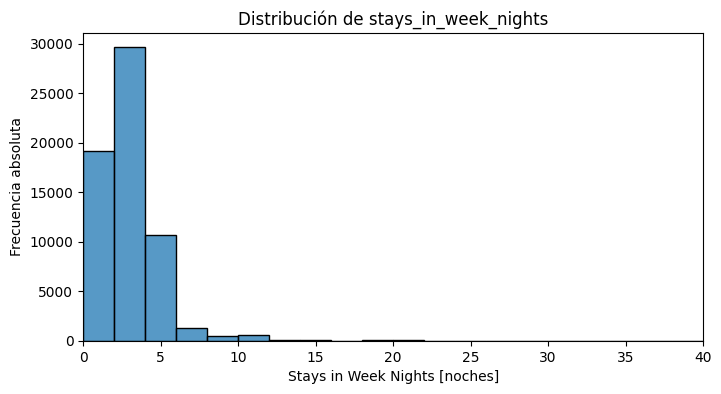

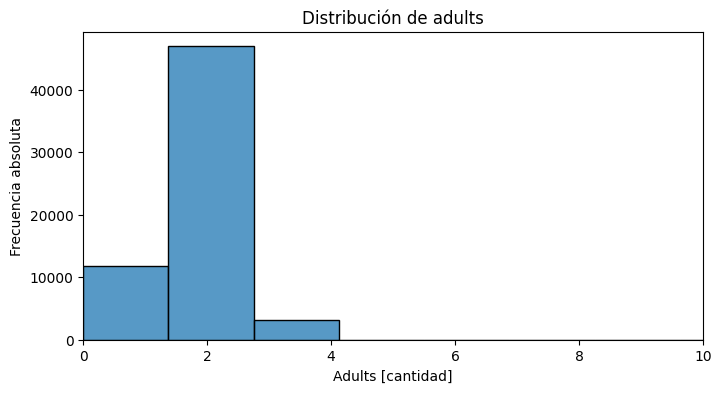

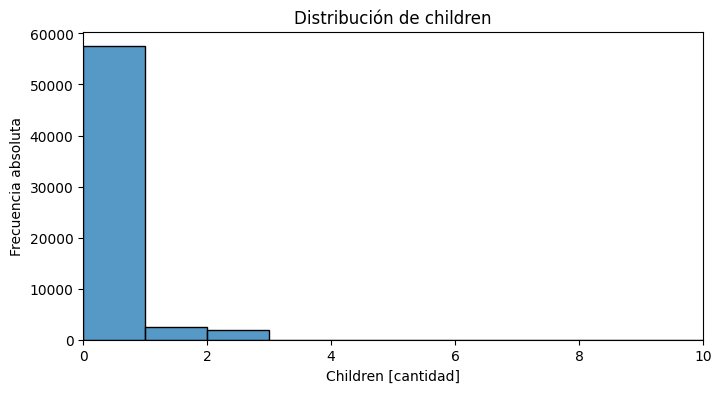

In [48]:
monthOrder = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

def drawGraphCategorical(column, df, kdeInput):
    plt.figure(figsize=(8, 4))

    # Caso especial para mantener un order por mes
    if column == "arrival_date_month":
        monthCategorical = pd.Categorical(first10Vars[column], categories=monthOrder, ordered=True)
        sns.histplot(monthCategorical, kde=kdeInput)
    else:
        sns.histplot(df[column], kde=kdeInput)

    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia absoluta')

def drawGraphNumerical(column, df, kdeInput, binsInput):
    plt.figure(figsize=(8, 4))

    if binsInput != None:
            sns.histplot(df[column], kde=kdeInput, bins=binsInput) 
    else:
        sns.histplot(df[column], kde=kdeInput)  

    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia absoluta')
    plt.xlim(df[column].min(), df[column].max())

drawGraphCategorical("hotel", first10Vars, kdeInput=False)
plt.xlabel("Nombre de hotel")
plt.show()

drawGraphNumerical("lead_time", first10Vars, kdeInput=True, binsInput=200)
plt.xlabel("Lead time [días]")
plt.show()

drawGraphNumerical("arrival_date_year", first10Vars, kdeInput=False, binsInput=None)
plt.xlabel("Arrival date year [año]")
plt.show()

drawGraphCategorical("arrival_date_month", first10Vars, kdeInput=True)
plt.xlabel("Arrival Date Month [mes]")
plt.xticks(rotation=50)
plt.show()

drawGraphNumerical("arrival_date_week_number", first10Vars, kdeInput=True, binsInput=None)
plt.xlabel("Arrival Date Week Number [número de semana del año]")
plt.show()

drawGraphNumerical("stays_in_weekend_nights", first10Vars, kdeInput=False, binsInput=20)
plt.xlabel("Stays in Weekend Nights [noches]")
plt.xlim(first10Vars["stays_in_weekend_nights"].min(), 10)
plt.show()

drawGraphNumerical("stays_in_week_nights", first10Vars, kdeInput=False, binsInput=20)
plt.xlabel("Stays in Week Nights [noches]")
plt.xlim(first10Vars["stays_in_week_nights"].min(), 40)
plt.show()

drawGraphNumerical("adults", first10Vars, kdeInput=False, binsInput=40)
plt.xlabel("Adults [cantidad]")
plt.xlim(first10Vars["adults"].min(), 10)
plt.show()

drawGraphNumerical("children", first10Vars, kdeInput=False, binsInput=10)
plt.xlabel("Children [cantidad]")
plt.show()

Realizamos el mismo proceso para las visualizaciones de las siguiente 10 columnas

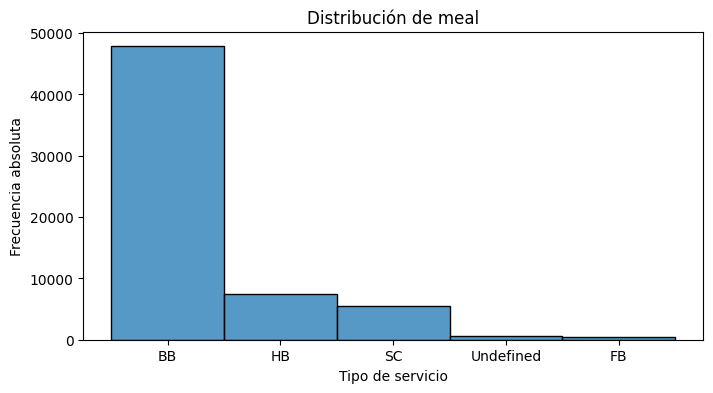

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3888\1687457931.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Segundas10Vars["country"] = encoder.fit_transform(Segundas10Vars["country"])


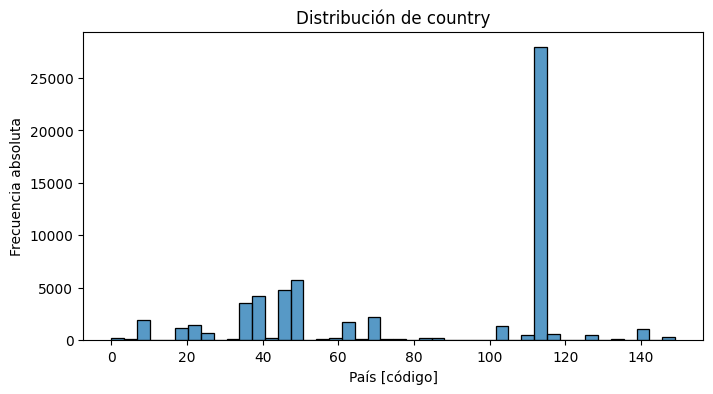

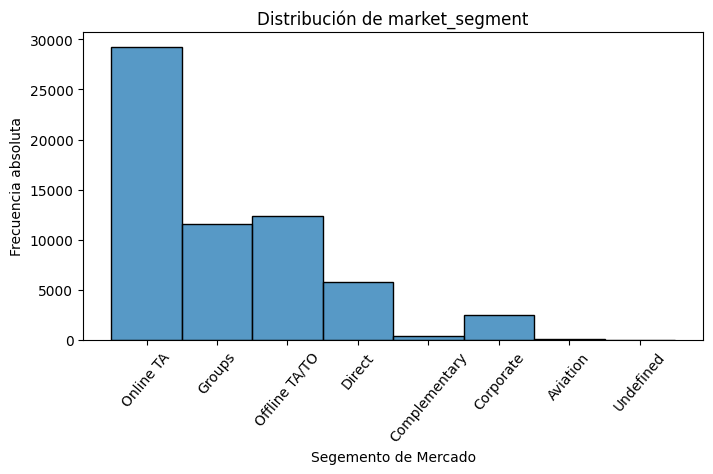

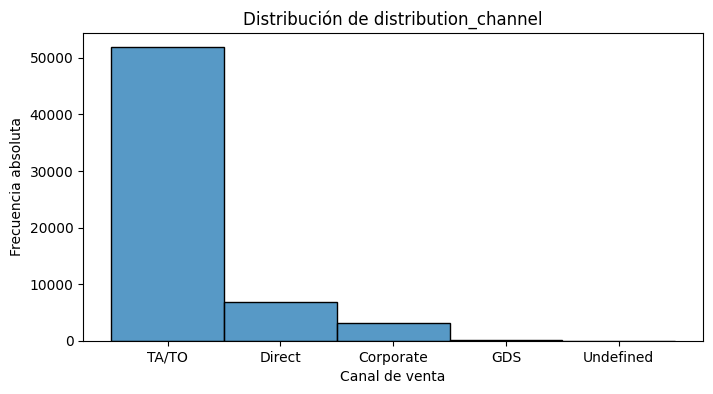

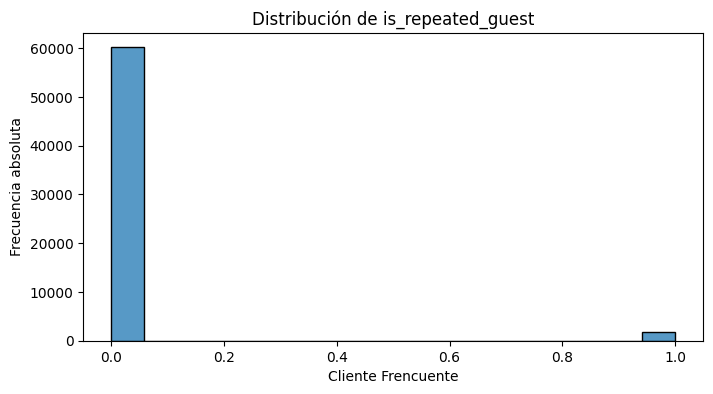

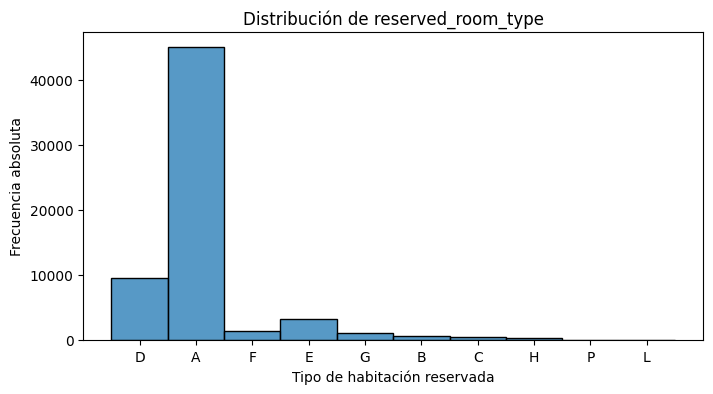

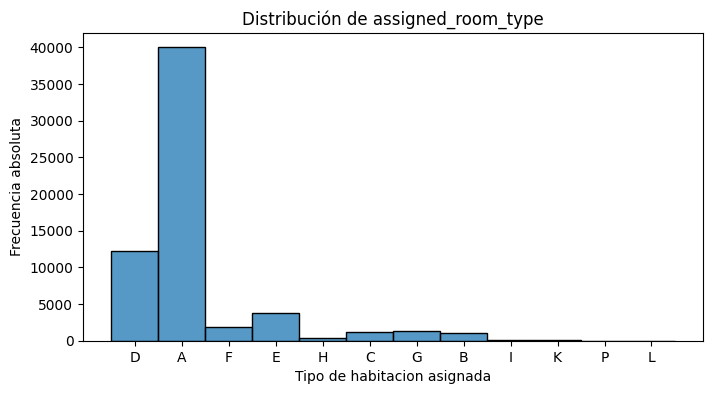

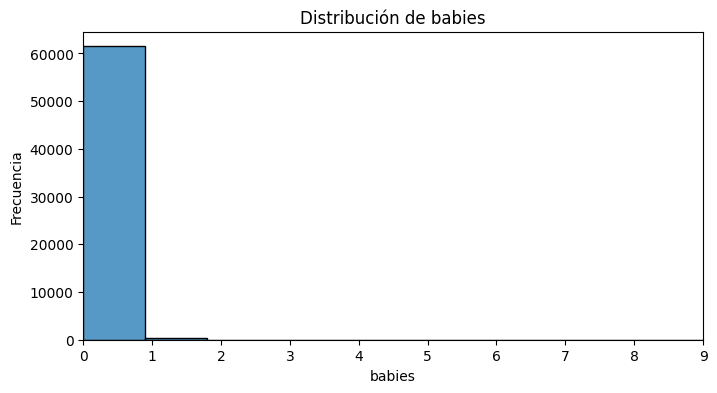

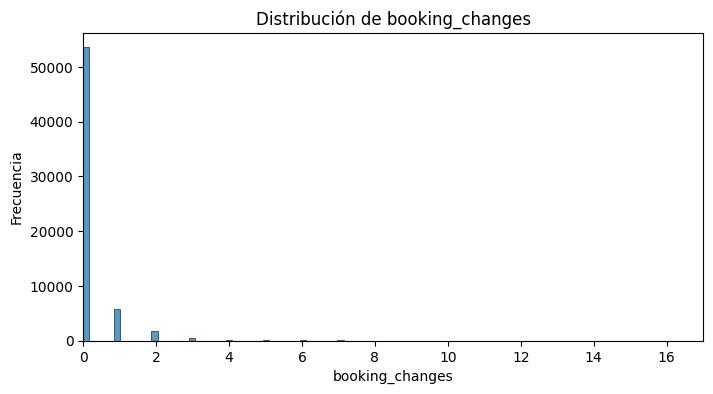

In [49]:
def drawGraphCategorical(column, df, kdeInput):
    plt.figure(figsize=(8, 4))  # Tamaño de la figura
    sns.histplot(df[column], kde=kdeInput)  
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia absoluta')
    #plt.ylim(0, last_10_variables[column].value_counts().max())

def drawGraphNumerical(column, df, kdeInput, binsInput):
    plt.figure(figsize=(8, 4))  # Tamaño de la figura
    if binsInput != None:
            sns.histplot(df[column], kde=kdeInput, bins=binsInput) 
    else:
        sns.histplot(df[column], kde=kdeInput)  
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    #plt.ylim(0, last_10_variables[column].value_counts().max())
    plt.xlim(df[column].min(), df[column].max())

drawGraphCategorical("meal", Segundas10Vars, kdeInput=False)
plt.xlabel("Tipo de servicio")
plt.show()

#Hacemos encoding de esta variable para visualizarla mejor
encoder = LabelEncoder()
Segundas10Vars["country"] = encoder.fit_transform(Segundas10Vars["country"])
drawGraphCategorical("country", Segundas10Vars, kdeInput=False)
plt.xlabel("País [código]")
plt.show()

drawGraphCategorical("market_segment", Segundas10Vars, kdeInput=False)
plt.xlabel("Segemento de Mercado")
plt.xticks(rotation=50)
plt.show()
drawGraphCategorical("distribution_channel", Segundas10Vars, kdeInput=False)
plt.xlabel("Canal de venta")
plt.show()
drawGraphCategorical("is_repeated_guest", Segundas10Vars, kdeInput=False)
plt.xlabel("Cliente Frencuente")
plt.show()
drawGraphCategorical("reserved_room_type", Segundas10Vars, kdeInput=False)
plt.xlabel("Tipo de habitación reservada")
plt.show()
drawGraphCategorical("assigned_room_type", Segundas10Vars, kdeInput=False)
plt.xlabel("Tipo de habitacion asignada")
plt.show()

drawGraphNumerical("babies", Segundas10Vars, kdeInput=False, binsInput=10)
plt.show()
drawGraphNumerical("booking_changes", Segundas10Vars, kdeInput=False, binsInput=100)
plt.show()


No tenemos en cuenta la visualizacion de los id, porque son siempre valores unicos, que van a variar constantemente

      deposit_type  agent  company  days_in_waiting_list    customer_type  \
0       No Deposit    9.0      NaN                     0        Transient   
1       No Deposit    NaN      NaN                     0        Transient   
2       No Deposit    9.0      NaN                     0        Transient   
3       Non Refund  154.0      NaN                     0        Transient   
4       No Deposit   20.0      NaN                     0  Transient-Party   
...            ...    ...      ...                   ...              ...   
61908   No Deposit  240.0      NaN                     0        Transient   
61909   No Deposit    NaN      NaN                     0        Transient   
61910   No Deposit    NaN    153.0                     0        Transient   
61911   Non Refund   96.0      NaN                     0        Transient   
61912   No Deposit    9.0      NaN                     0        Transient   

          adr  required_car_parking_spaces  total_of_special_requests  \
0 

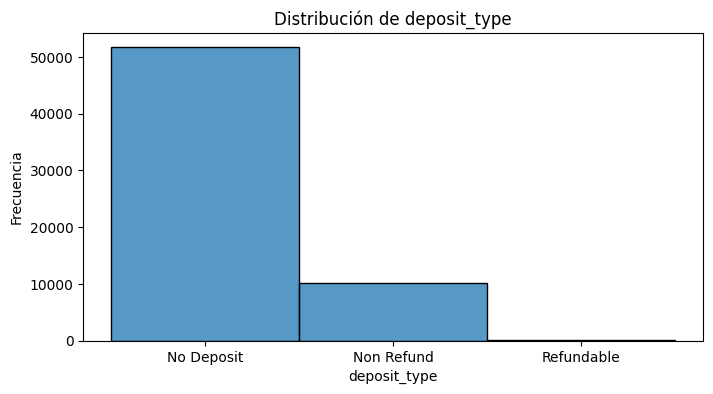

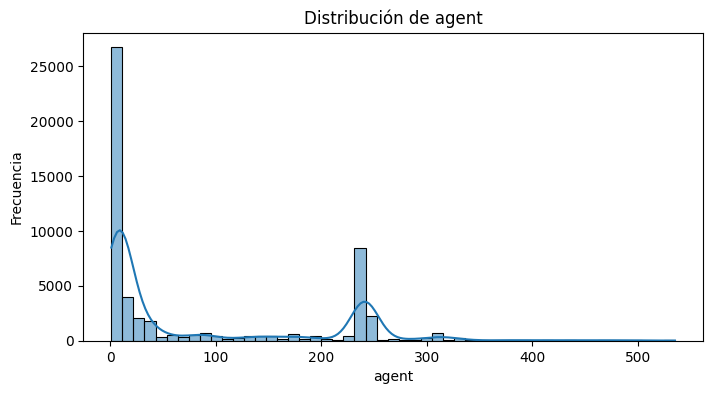

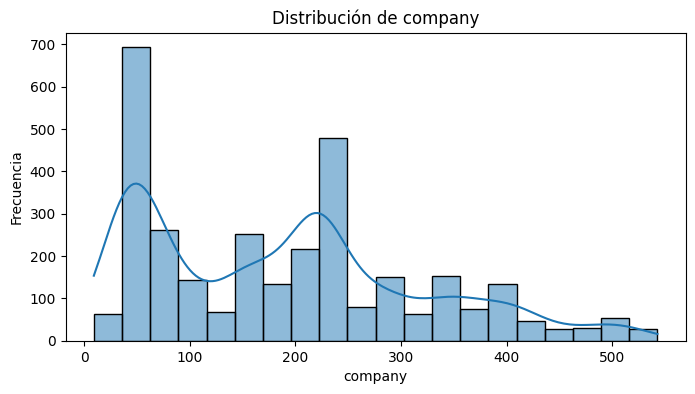

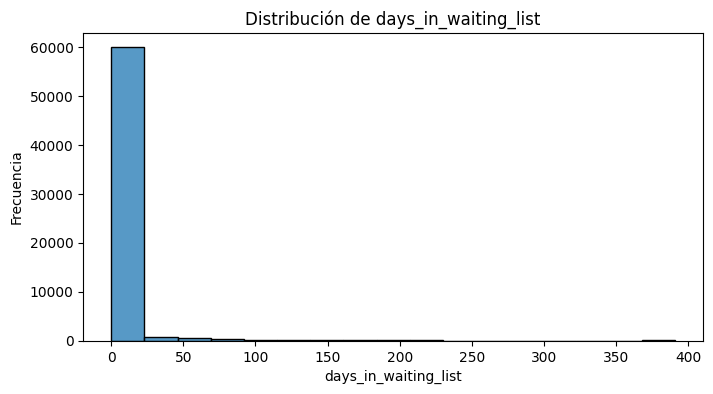

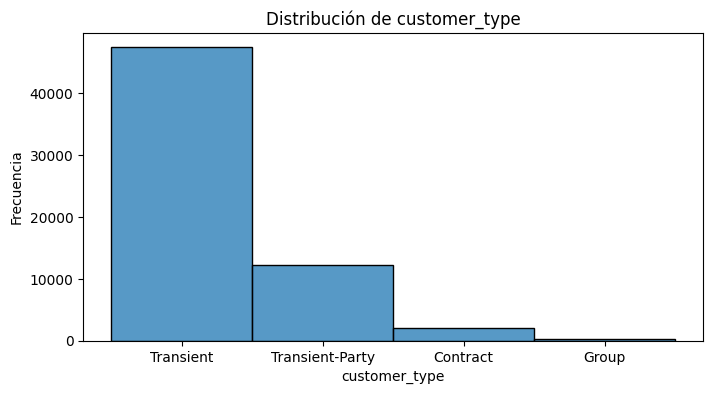

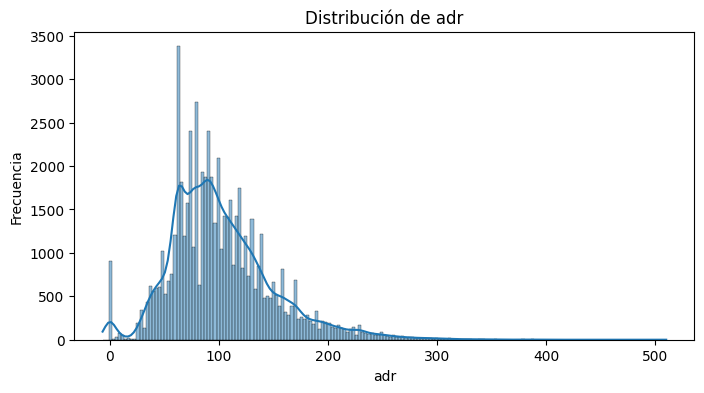

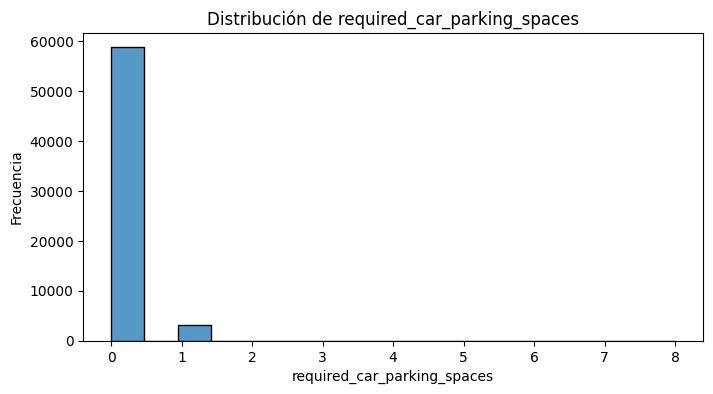

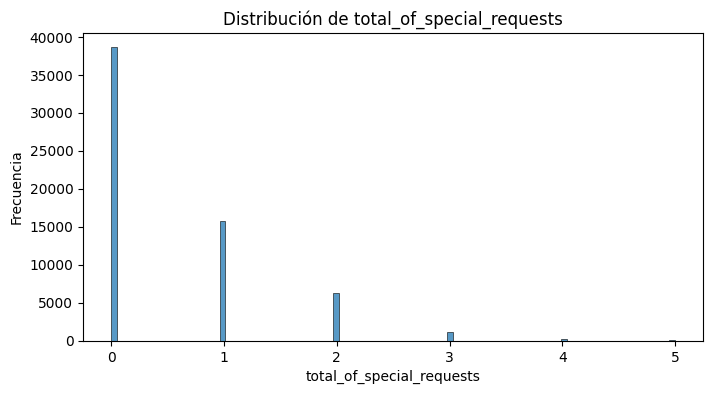

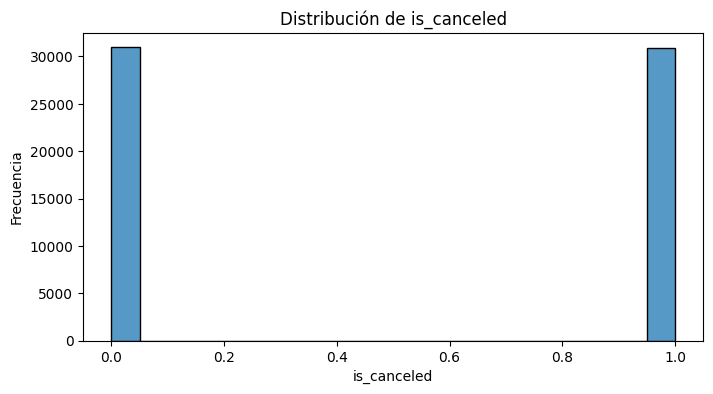

In [50]:
last_10_variables = hotelsTrain.iloc[:, -10:]
print(last_10_variables)

def graficar(column, last_10_variables, kdeInput):
    if column != "id":
        plt.figure(figsize=(8, 4))  # Tamaño de la figura
        sns.histplot(last_10_variables[column], kde=kdeInput) 
        plt.title(f'Distribución de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        #plt.ylim(0, last_10_variables[column].value_counts().max())
        plt.show()

graficar(last_10_variables.columns[0], last_10_variables, False)
graficar(last_10_variables.columns[1], last_10_variables, True)
graficar(last_10_variables.columns[2], last_10_variables, True)
graficar(last_10_variables.columns[3], last_10_variables, False)
graficar(last_10_variables.columns[4], last_10_variables, False)
graficar(last_10_variables.columns[5], last_10_variables, True)
graficar(last_10_variables.columns[6], last_10_variables, False)
graficar(last_10_variables.columns[7], last_10_variables, False)
graficar(last_10_variables.columns[9], last_10_variables, False)        

### Correlaciones de variables

Para analizar las correlaciones utilizamos el coeficiente de correlación de Pearson, cada variable contra cada variable, formando una matriz. Como el coeficiente va entre -1 y 1, visualizamos la matriz con un mapa de calor para observar visualmente posibles correlaciones.

Hacemos un encoding de las variables categóricas para que el método de pandas pueda evaluar las correlaciones

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3888\3203968201.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = hotelsTrainEncoded.corr(method="pearson")


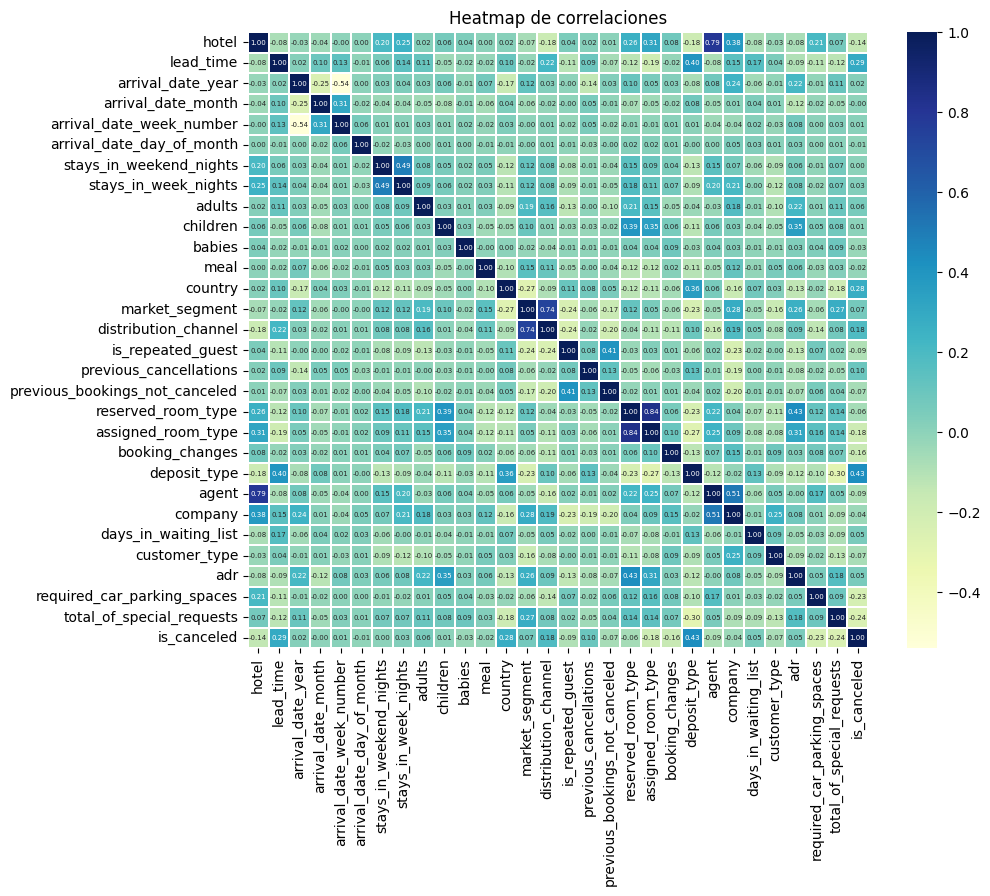

In [51]:
hotelsTrainEncoded = hotelsTrain.copy()
hotelsTrainEncoded["hotel"] = hotelsTrainEncoded["hotel"].astype("category").cat.codes
hotelsTrainEncoded["arrival_date_month"] = hotelsTrainEncoded["arrival_date_month"].astype("category").cat.codes
hotelsTrainEncoded["meal"] = hotelsTrainEncoded["meal"].astype("category").cat.codes
hotelsTrainEncoded["country"] = hotelsTrainEncoded["country"].astype("category").cat.codes
hotelsTrainEncoded["market_segment"] = hotelsTrainEncoded["market_segment"].astype("category").cat.codes
hotelsTrainEncoded["distribution_channel"] = hotelsTrainEncoded["distribution_channel"].astype("category").cat.codes
hotelsTrainEncoded["reserved_room_type"] = hotelsTrainEncoded["reserved_room_type"].astype("category").cat.codes
hotelsTrainEncoded["assigned_room_type"] = hotelsTrainEncoded["assigned_room_type"].astype("category").cat.codes
hotelsTrainEncoded["deposit_type"] = hotelsTrainEncoded["deposit_type"].astype("category").cat.codes
hotelsTrainEncoded["customer_type"] = hotelsTrainEncoded["customer_type"].astype("category").cat.codes

correlationMatrix = hotelsTrainEncoded.corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(data=correlationMatrix, annot=True,fmt=".2f", cmap="YlGnBu", linewidths=.1, annot_kws={"size": 5})
plt.title("Heatmap de correlaciones")
plt.show()


Obervamos del heat_map algunas variables que poseen una correlacion mas fuerte entre si.
En primer lugar aquellas que tienen fuerte correlacion con el target "is_canceled" y otras que tienen fuerte correlacion entre ellas.
Siendo notorias: deposit type - is canceled/ lead_time - is canceled / country - is canceled (todas vs target).

Otras correlaciones fuertes :lead_time-deposit type , deposit type-country , agent-hotel ,distribution channel- lead time.

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3888\1120721204.py:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix(ds_scatter_matrix, alpha=0.2, ax=ax)


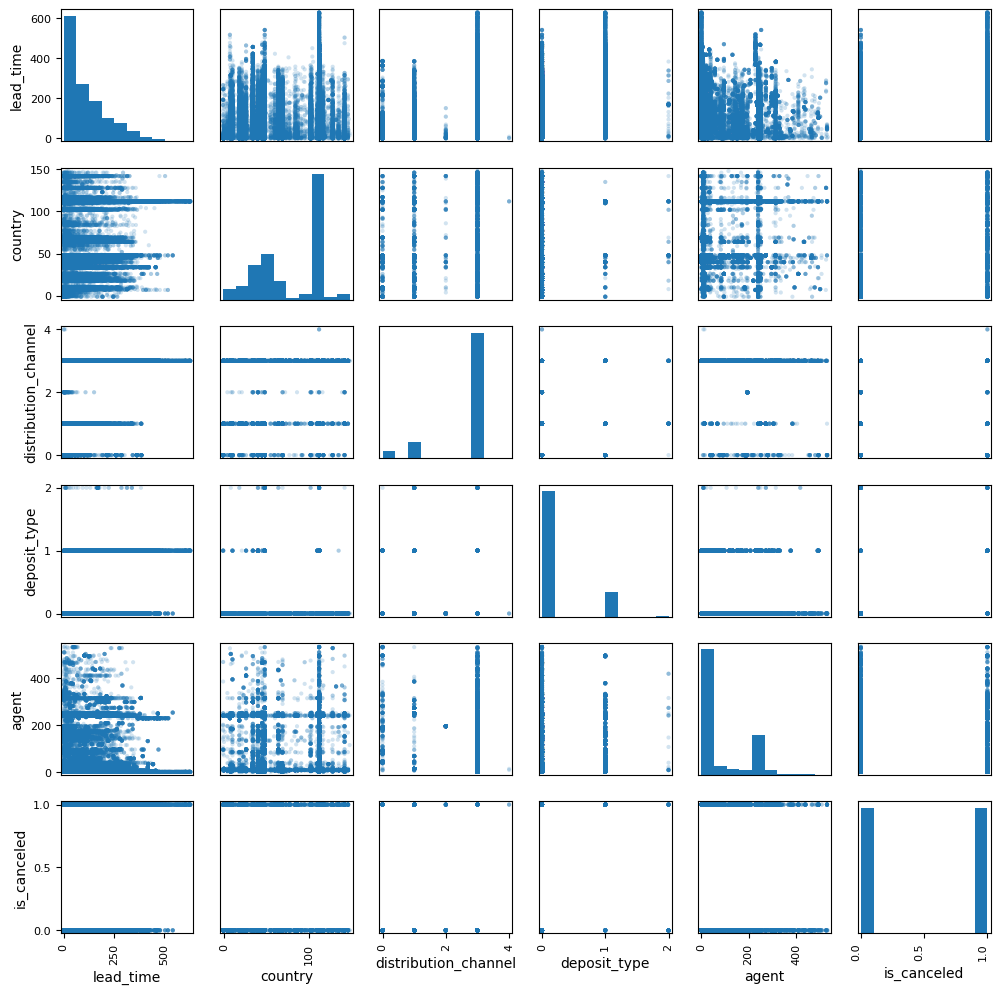

In [52]:
columns=hotelsTrainEncoded.columns.tolist()
columns_to_remove = ['hotel','adr','arrival_date_month','arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'company', 'days_in_waiting_list', 'customer_type', 'total_of_special_requests', 'required_car_parking_spaces', 'id']

columns = [col for col in hotelsTrainEncoded.columns.tolist() if col not in columns_to_remove]

ds_scatter_matrix = hotelsTrainEncoded[columns].copy()
#scatter_matrix(ds_scatter_matrix, alpha=0.2)

fig, ax = plt.subplots(figsize=(12, 12))

# Genera el scatter matrix
scatter_matrix(ds_scatter_matrix, alpha=0.2, ax=ax)

# Rotar los labels de los ejes
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=90, ha='right')

# Añadir espaciado entre los subplots para que los labels no se solapen
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Mostrar el gráfico
plt.show()

Observamos las siguientes correlaciones:

- arrival_date_year y arrival_date_week_number

In [53]:
correlationMatrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, hotel to is_canceled
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           30 non-null     float64
 1   lead_time                       30 non-null     float64
 2   arrival_date_year               30 non-null     float64
 3   arrival_date_month              30 non-null     float64
 4   arrival_date_week_number        30 non-null     float64
 5   arrival_date_day_of_month       30 non-null     float64
 6   stays_in_weekend_nights         30 non-null     float64
 7   stays_in_week_nights            30 non-null     float64
 8   adults                          30 non-null     float64
 9   children                        30 non-null     float64
 10  babies                          30 non-null     float64
 11  meal                            30 non-null     float64
 12  country                       

In [54]:
coefficient = round(correlationMatrix.loc["previous_bookings_not_canceled"].loc["is_repeated_guest"], 3)
coefficient

0.406

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

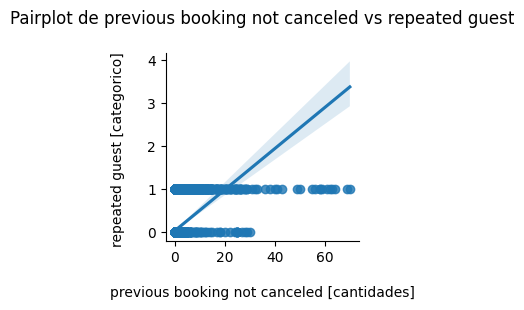

In [55]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="previous_bookings_not_canceled", y_vars="is_repeated_guest", data=hotelsTrain, kind="reg")
plt.xlabel("\nprevious booking not canceled [cantidades]")
plt.ylabel("repeated guest [categorico] \n")
plt.title('Pairplot de previous booking not canceled vs repeated guest\n')
plt.show()

In [56]:
coefficient = round(correlationMatrix.loc["deposit_type"].loc["is_canceled"], 3)
coefficient

0.431

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

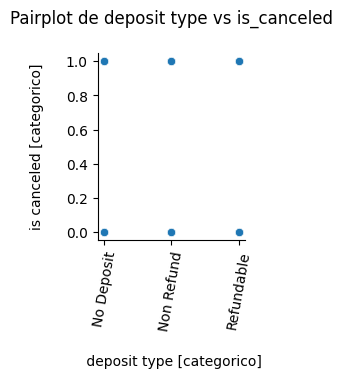

In [57]:
plt.figure(figsize=(10, 10))
sns.pairplot(x_vars="deposit_type", y_vars="is_canceled", data=hotelsTrain)

plt.xlabel("\n deposit type [categorico]")
plt.ylabel("is canceled [categorico]\n")
plt.title('Pairplot de deposit type vs is_canceled\n')
plt.xticks(rotation=80)
# Mostrar el gráfico
plt.show()

In [58]:
coefficient = round(correlationMatrix.loc["country"].loc["deposit_type"], 3)
coefficient

0.357

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

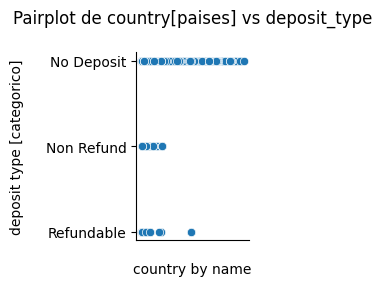

In [59]:
plt.figure(figsize=(10, 10))
sns.pairplot(x_vars="country", y_vars="deposit_type", data=hotelsTrain)

plt.xlabel("\ncountry by name")
plt.xticks([])
plt.ylabel("deposit type [categorico]\n")
plt.title('Pairplot de country[paises] vs deposit_type\n')
plt.show()

In [60]:
coefficient = round(correlationMatrix.loc["market_segment"].loc["distribution_channel"], 3)
coefficient

0.741

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3888\426728255.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(deposit_labels)


<Figure size 1000x1000 with 0 Axes>

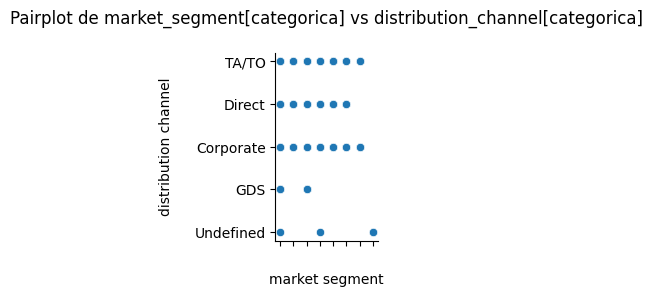

In [61]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="market_segment", y_vars="distribution_channel", data=hotelsTrain)

deposit_labels = ["", "", ""] 
plt.gca().set_xticklabels(deposit_labels)

plt.xlabel("\nmarket segment")
plt.ylabel("distribution channel\n")
plt.title('Pairplot de market_segment[categorica] vs distribution_channel[categorica]\n')
plt.show()

In [62]:
coefficient = round(correlationMatrix.loc["arrival_date_year"].loc["arrival_date_week_number"], 3)
coefficient

-0.541

Exploramos la correlación con un gráfico

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

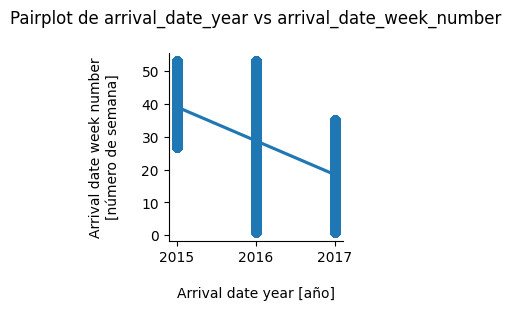

In [63]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="arrival_date_year", y_vars="arrival_date_week_number", data=hotelsTrain, kind="reg")
plt.xlabel("\nArrival date year [año]")
plt.ylabel("Arrival date week number\n[número de semana]\n")
plt.title('Pairplot de arrival_date_year vs arrival_date_week_number\n')
plt.show()

Posiblemente esta correlación exista debido a un comienzo de registro de datos desde mediados de 2015 hasta fines de 2017.

- stays_in_weekend_nights - stays_in_week_nights

In [64]:
coefficient = round(correlationMatrix.loc["stays_in_weekend_nights"].loc["stays_in_week_nights"], 3)
coefficient

0.489

Exploramos la correlación con un gráfico

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

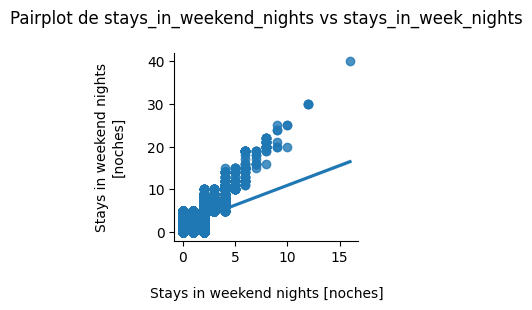

In [65]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="stays_in_weekend_nights", y_vars="stays_in_week_nights", data=hotelsTrain, kind="reg")
plt.xlabel("\nStays in weekend nights [noches]")
plt.ylabel("Stays in weekend nights\n[noches]\n")
plt.title('Pairplot de stays_in_weekend_nights vs stays_in_week_nights\n')
plt.show()

Esta correlación es natural debido a que a mayor cantidad de días en total que alguien se queda en el hotel, más crece la cantidad de días entre semana y en fin de semana.

- children - adr

In [66]:
coefficient = round(correlationMatrix.loc["children"].loc["adr"], 3)
coefficient

0.35

Exploramos la correlación con un gráfico

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

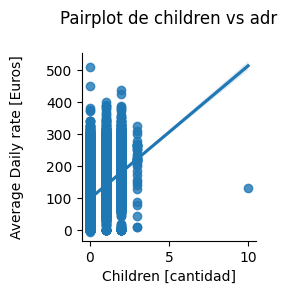

In [67]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="children", y_vars="adr", data=hotelsTrain, kind="reg")
plt.xlabel("Children [cantidad]")
plt.ylabel("Average Daily rate [Euros]\n")
plt.title('Pairplot de children vs adr\n')
plt.show()

Esta correlación puede estar dada porque al tener más hijos se reservan habitaciones con más camas, por ende más grandes y más caras.

- agent - company

In [68]:
coefficient = round(correlationMatrix.loc["agent"].loc["company"], 3)
coefficient

0.515

Exploramos la correlación con un gráfico

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

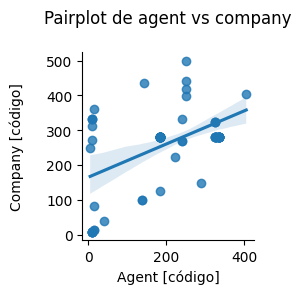

In [69]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="agent", y_vars="company", data=hotelsTrain, kind="reg")
plt.xlabel("Agent [código]")
plt.ylabel("Company [código]\n")
plt.title('Pairplot de agent vs company\n')
plt.show()

Esta correlación probablemente sea una coincidencia en la dispersión de los datos dada la poca información que ofrece la variable company en relación con el conjunto total de datos, dado que contiene ~95% de datos faltantes.

- lead_time - is_canceled

In [70]:
coefficient = round(correlationMatrix.loc["lead_time"].loc["is_canceled"], 3)
coefficient

0.294

Exploramos la correlación con un gráfico

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

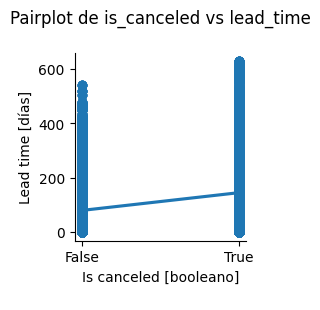

In [71]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="is_canceled", y_vars="lead_time", data=hotelsTrain, kind="reg")
plt.xlabel("Is canceled [booleano]\n")
plt.ylabel("Lead time [días]")
plt.title('Pairplot de is_canceled vs lead_time\n')
plt.xticks([0, 1], ["False", "True"])
plt.show()

De esta correlación se podría entender que mientras más tiempo antes de haga la reserva del hotel, es más probable que se cancele la misma.

hotel -agent

In [72]:
coefficient = round(correlationMatrix.loc["hotel"].loc["agent"], 3)
coefficient

0.793

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

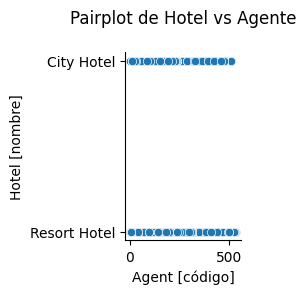

In [73]:
plt.figure(figsize=(20,20))

sns.pairplot(data=hotelsTrain, x_vars="agent", y_vars="hotel", kind="scatter")
plt.xlabel("Agent [código]")
plt.ylabel("Hotel [nombre]")
plt.title('Pairplot de Hotel vs Agente\n')
plt.show()

deposit type - lead time

In [74]:
coefficient = round(correlationMatrix.loc["deposit_type"].loc["lead_time"], 3)
coefficient

0.402

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

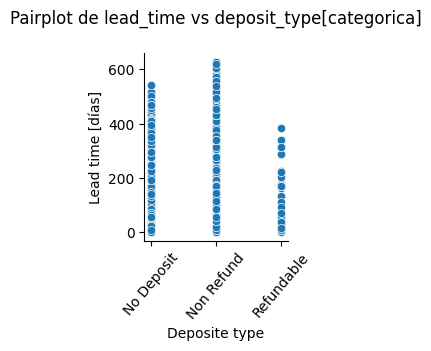

In [75]:
plt.figure(figsize=(20,20))
sns.pairplot(x_vars="deposit_type", y_vars="lead_time", data=hotelsTrain, kind="scatter")
plt.xlabel("Deposite type")
plt.xticks(rotation=50)
plt.ylabel("Lead time [días]")
plt.title('Pairplot de lead_time vs deposit_type[categorica]\n')
plt.show()

company - hotel

In [76]:
coefficient = round(correlationMatrix.loc["company"].loc["hotel"], 3)
coefficient

0.378

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

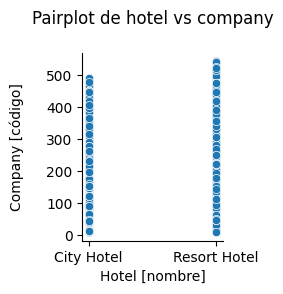

In [77]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="hotel", y_vars="company", data=hotelsTrain, kind="scatter")
plt.xlabel("Hotel [nombre]")
plt.ylabel("Company [código]\n")
plt.title('Pairplot de hotel vs company\n')
plt.show()

assigned room type - reserved room type

In [78]:
coefficient = round(correlationMatrix.loc["assigned_room_type"].loc["reserved_room_type"], 3)
coefficient

0.841

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

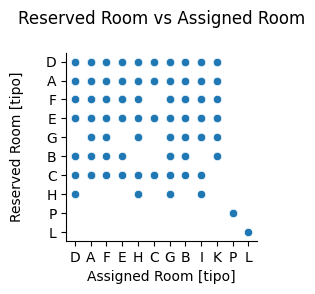

In [79]:
plt.figure(figsize=(10,10))
sns.pairplot(x_vars="assigned_room_type", y_vars="reserved_room_type", data=hotelsTrain, kind="scatter")
plt.xlabel("Assigned Room [tipo]")
plt.ylabel("Reserved Room [tipo]\n")
plt.title('Reserved Room vs Assigned Room\n')
plt.show()

Observamos que todas las habitaciones son normalmente cambiadas salvo las clase P y L que no sufren cambios.

### Relación con el target (is_canceled)

Analizamos la relación que las primeras 10 variables tienen con is_canceled

Analizamos hotel contra is_canceled con un countplot

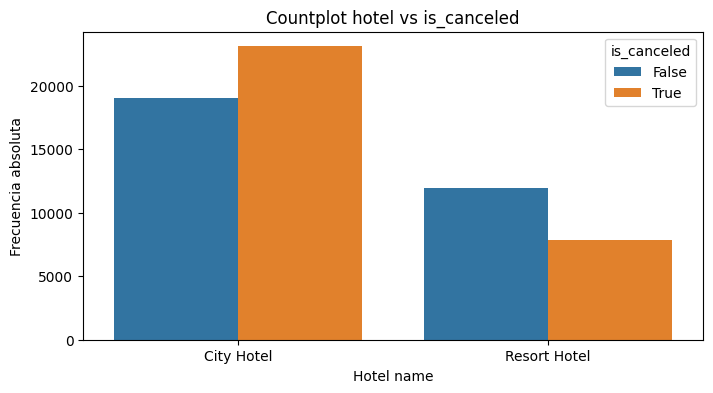

In [80]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='hotel', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('Hotel name')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot hotel vs is_canceled')
plt.show()

Analizamos lead_time contra is_canceled con un histograma

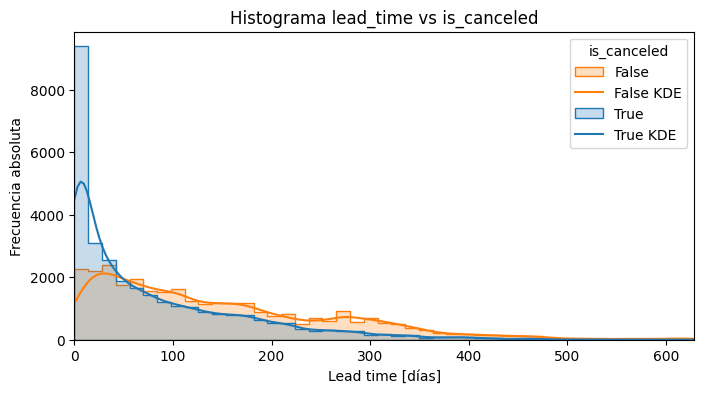

In [81]:
plt.figure(figsize=(8, 4))
sns.histplot(data=hotelsTrain, x='lead_time', hue='is_canceled', bins=45, kde=True, element="step")
plt.legend(title='is_canceled', labels=["False", "False KDE", "True", "True KDE"])
plt.xlim(hotelsTrain.lead_time.min(), hotelsTrain.lead_time.max())
plt.xlabel('Lead time [días]')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma lead_time vs is_canceled')
plt.show()

Analizamos arrival_date_year contra is_canceled con un countplot

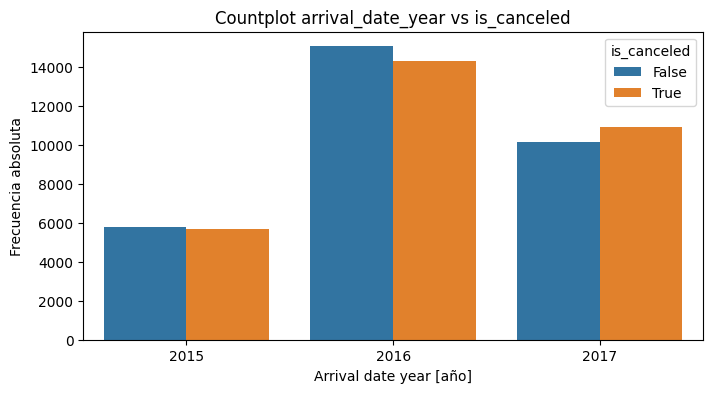

In [82]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='arrival_date_year', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('Arrival date year [año]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot arrival_date_year vs is_canceled')
plt.show()

Analizamos arrival_date_month contra is_canceled con un countplot

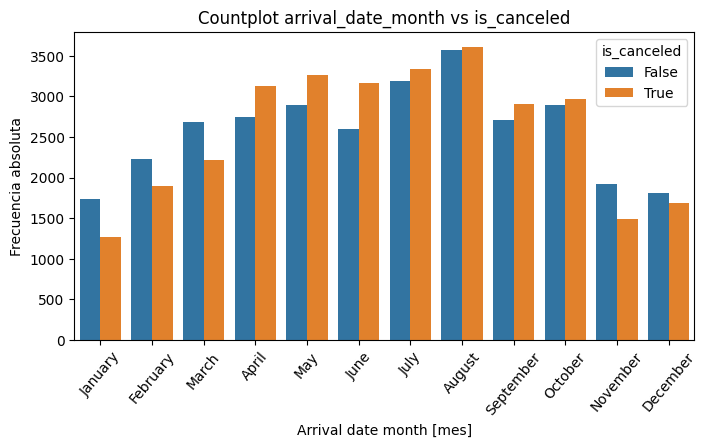

In [83]:
monthOrder = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data = hotelsTrain.copy().get(["arrival_date_month", "is_canceled"])
data["arrival_date_month"] = pd.Categorical(hotelsTrain["arrival_date_month"], categories=monthOrder, ordered=True)

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='arrival_date_month', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('Arrival date month [mes]')
plt.xticks(rotation=50)
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot arrival_date_month vs is_canceled')
plt.show()

Analizamos arrival_date_week_number contra is_canceled con un histograma

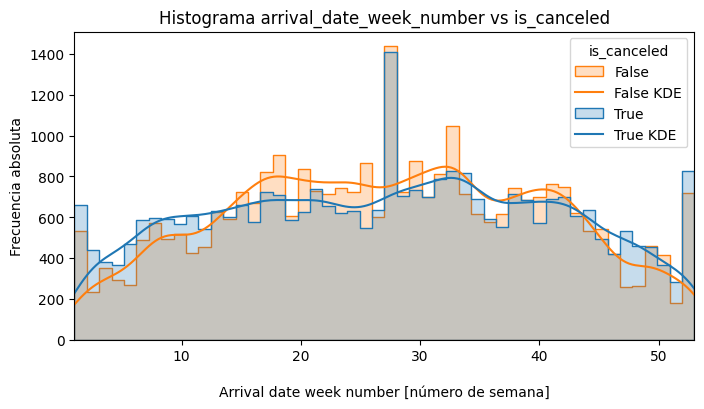

In [84]:
plt.figure(figsize=(8, 4))
sns.histplot(data=hotelsTrain, x='arrival_date_week_number', hue='is_canceled', bins=50, kde=True, element="step")
plt.legend(title='is_canceled', labels=["False", "False KDE", "True", "True KDE"])
plt.xlim(hotelsTrain.arrival_date_week_number.min(), hotelsTrain.arrival_date_week_number.max())
plt.xlabel('\nArrival date week number [número de semana]')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma arrival_date_week_number vs is_canceled')
plt.show()

Analizamos arrival_date_day_of_month contra is_canceled con un histograma

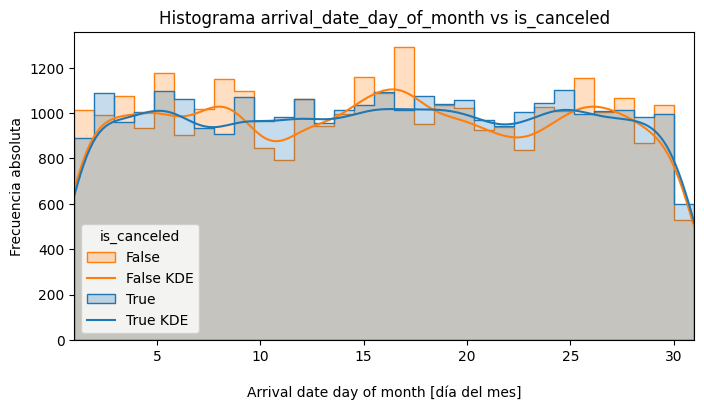

In [85]:
plt.figure(figsize=(8, 4))
sns.histplot(data=hotelsTrain, x='arrival_date_day_of_month', hue='is_canceled', bins=31, kde=True, element="step")
plt.legend(title='is_canceled', labels=["False", "False KDE", "True", "True KDE"])
plt.xlim(hotelsTrain.arrival_date_day_of_month.min(), hotelsTrain.arrival_date_day_of_month.max())
plt.xlabel('\nArrival date day of month [día del mes]')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma arrival_date_day_of_month vs is_canceled')
plt.show()

Analizamos stays_in_weekend_nights contra is_canceled con un countplot

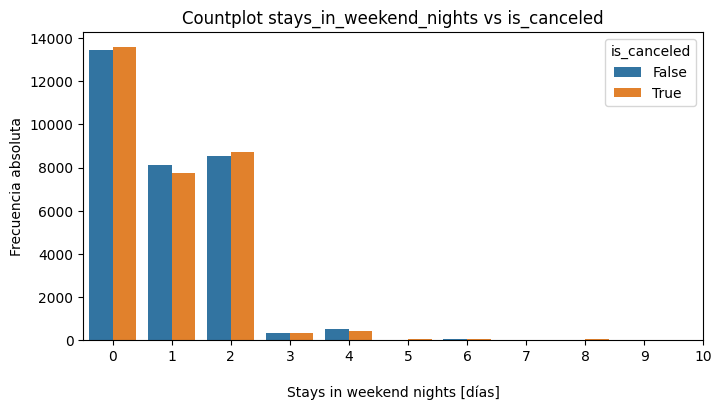

In [86]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='stays_in_weekend_nights', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlim(right=10)
plt.xlabel('\nStays in weekend nights [días]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot stays_in_weekend_nights vs is_canceled')
plt.show()

Analizamos stays_in_week_nights contra is_canceled con un countplot

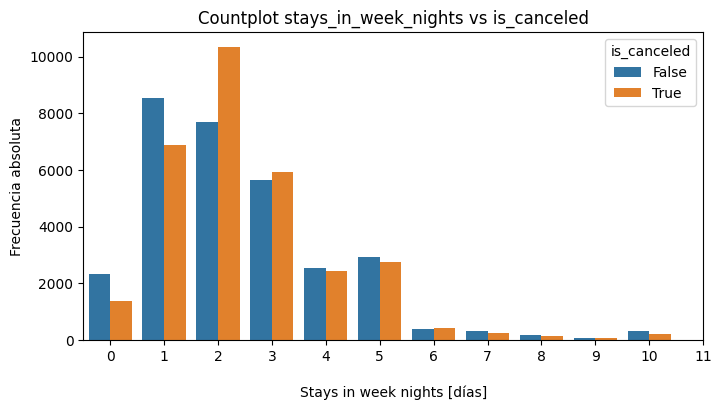

In [87]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='stays_in_week_nights', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlim(right=11)
plt.xlabel('\nStays in week nights [días]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot stays_in_week_nights vs is_canceled')
plt.show()

Analizamos adults contra is_canceled con un countplot

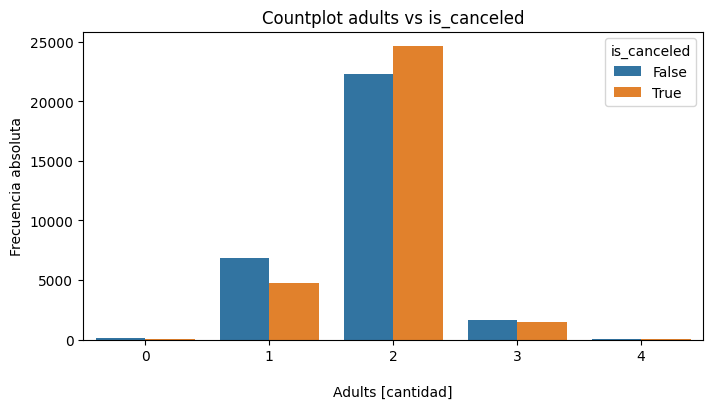

In [88]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='adults', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlim(right=4.5)
plt.xlabel('\nAdults [cantidad]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot adults vs is_canceled')
plt.show()

Analizo children contra is_canceled con un countplot

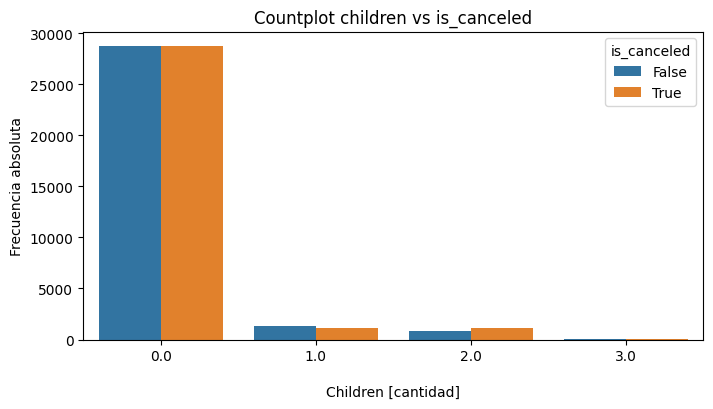

In [89]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='children', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlim(right=3.5)
plt.xlabel('\nChildren [cantidad]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot children vs is_canceled')
plt.show()

Analizamos babies contra is_canceled con un countplot

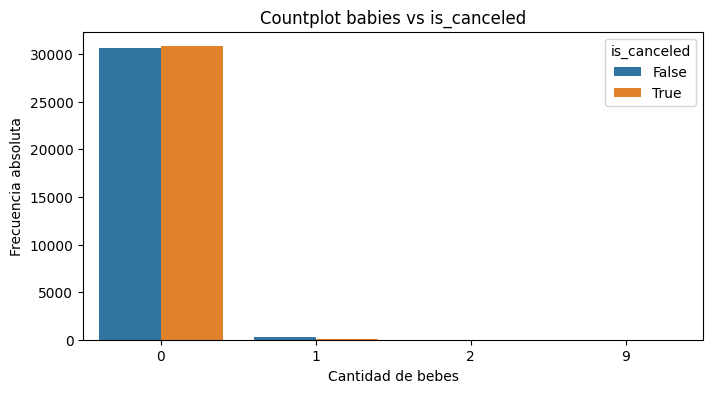

In [90]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='babies', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('Cantidad de bebes')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot babies vs is_canceled')
plt.show()

Analizamos meal contra is_canceled con un countplot

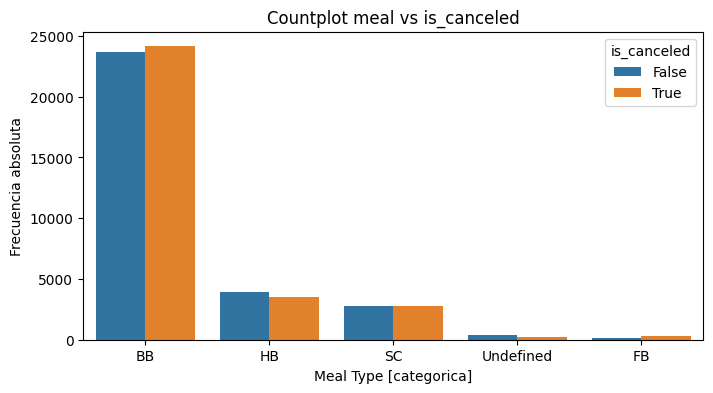

In [91]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='meal', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('Meal Type [categorica]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot meal vs is_canceled')
plt.show()

Analizamos country contra is_canceled con un countplot

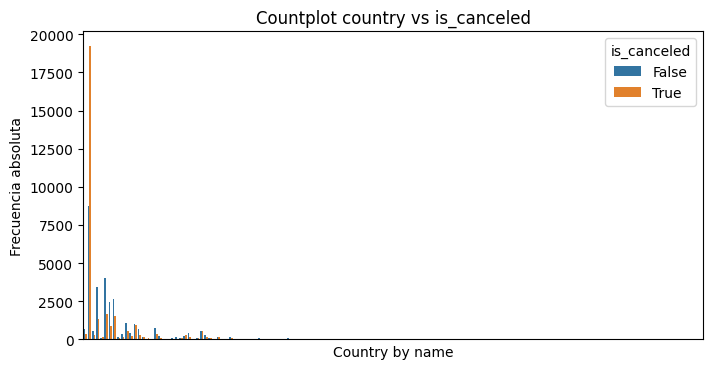

In [92]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='country', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('Country by name')
plt.ylabel('Frecuencia absoluta')
plt.xticks([])
plt.title('Countplot country vs is_canceled')
plt.show()

Analizamos market_segment contra is_canceled con un countplot

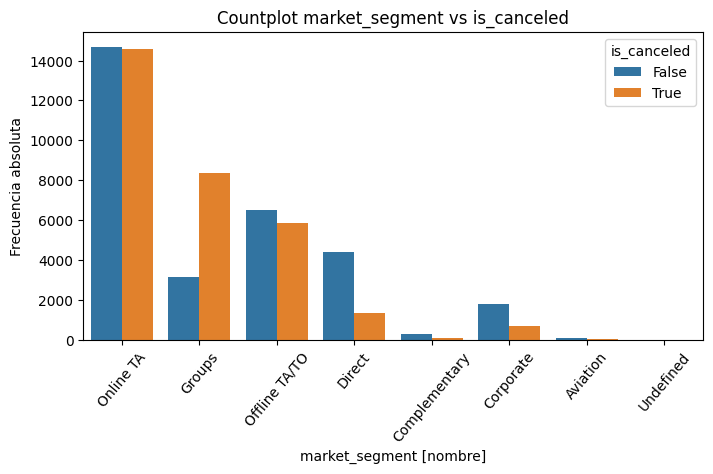

In [93]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='market_segment', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('market_segment [nombre]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot market_segment vs is_canceled')
plt.xticks(rotation=50)
plt.show()

Analizamos distribution_channel contra is_canceled con un countplot

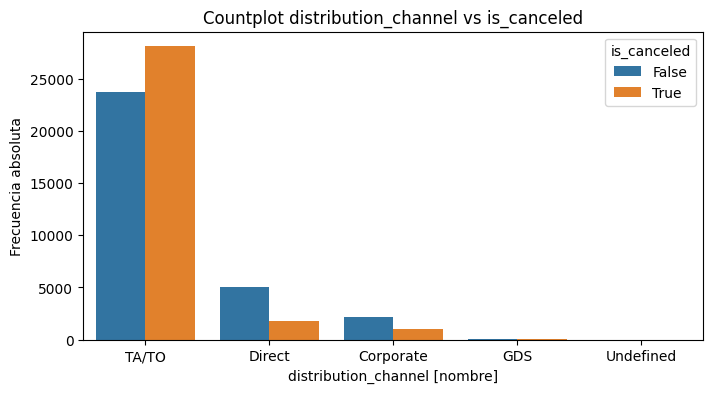

In [94]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='distribution_channel', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('distribution_channel [nombre]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot distribution_channel vs is_canceled')
plt.show()

Aqui se puede observar que el nivel de cancelacion de aquellas reservas que se adquieren mediante  los "tour operator" o "travel agent" son menos factibles de ser canceladas. Al contrario de aquellas adquiridas mediante otros canales de venta.

Analizamos is_repeated_guest contra is_canceled con un countplot

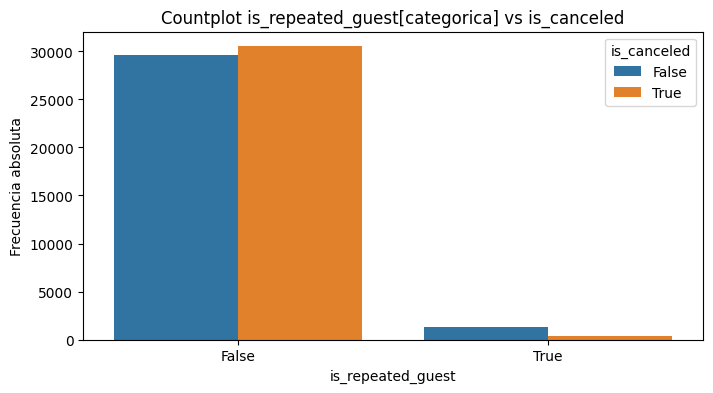

In [95]:
plt.figure(figsize=(8, 4))
data = hotelsTrain.copy()
data["is_repeated_guest"] = data["is_repeated_guest"].apply(lambda element: "False" if (element == 0) else "True" )
sns.countplot(data=data, x='is_repeated_guest', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('is_repeated_guest')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot is_repeated_guest[categorica] vs is_canceled')
plt.show()

En prinicpio, las observaciones de los casos donde el guesped se alojó previamente estan muy desbalanceadas. 

Analizamos previous_cancellations contra is_canceled con un countplot

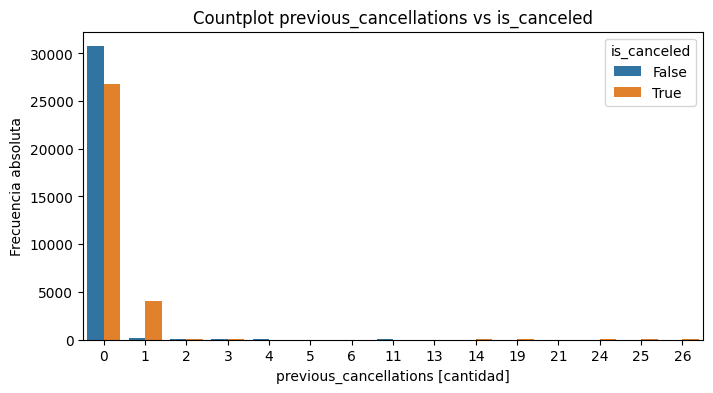

In [96]:

plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='previous_cancellations', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('previous_cancellations [cantidad]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot previous_cancellations vs is_canceled')
plt.show()

previous_bookings_not_canceled contra is_canceled con un countplot

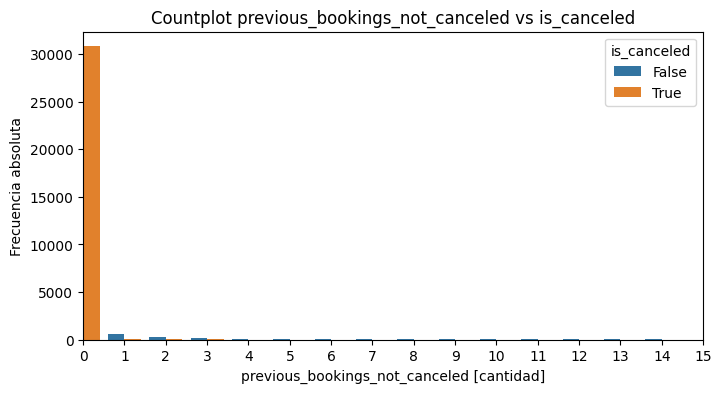

In [97]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='previous_bookings_not_canceled', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlim(0, 15)
plt.xlabel('previous_bookings_not_canceled [cantidad]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot previous_bookings_not_canceled vs is_canceled')
plt.show()

Analizamos reserved_room_type contra is_canceled con un countplot

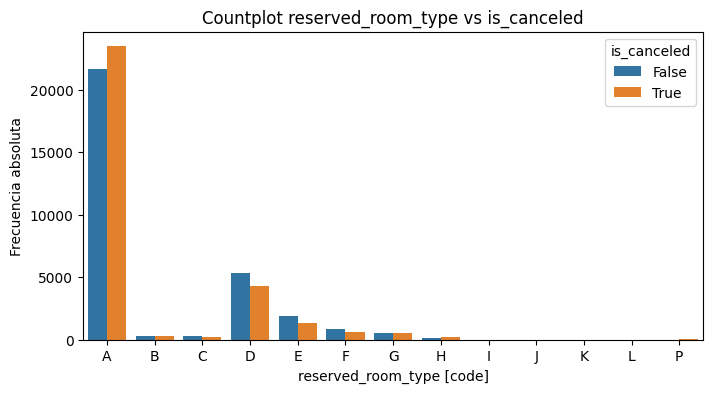

In [98]:
roomOrder = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L","P"]
data = hotelsTrain.copy().get(["reserved_room_type", "is_canceled"])
data["reserved_room_type"] = pd.Categorical(hotelsTrain["reserved_room_type"], categories=roomOrder, ordered=True)

plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='reserved_room_type', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('reserved_room_type [code]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot reserved_room_type vs is_canceled')
plt.show()

Analizamos assigned_room_type contra is_canceled con un countplot

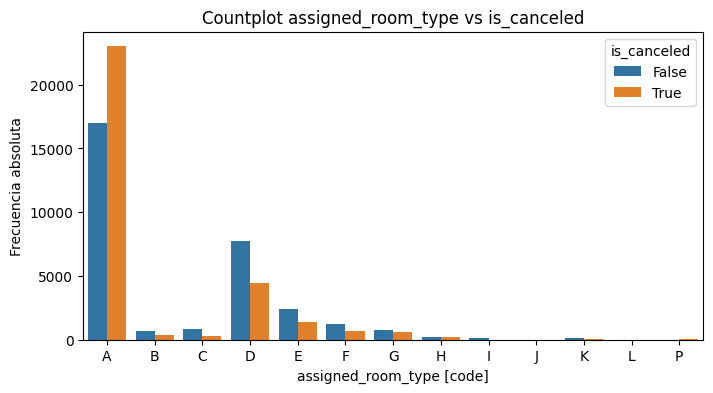

In [99]:
roomOrder = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L","P"]
data = hotelsTrain.copy().get(["assigned_room_type", "is_canceled"])
data["assigned_room_type"] = pd.Categorical(hotelsTrain["assigned_room_type"], categories=roomOrder, ordered=True)


plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='assigned_room_type', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('assigned_room_type [code]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot assigned_room_type vs is_canceled')
plt.show()

Analizamos booking_changes contra is_canceled con un countplot

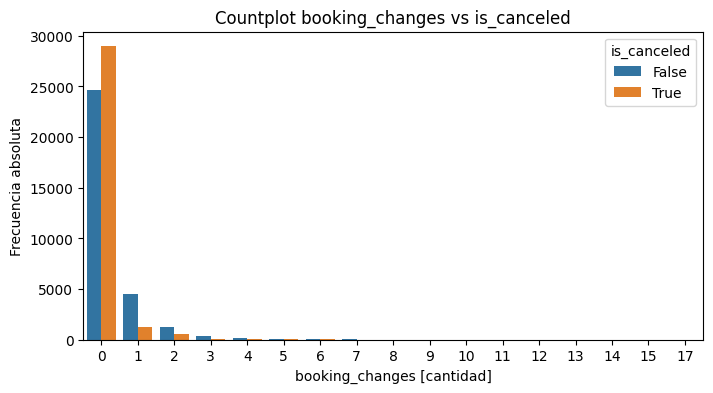

In [100]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='booking_changes', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('booking_changes [cantidad]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot booking_changes vs is_canceled')
plt.show()

Aqui observamos que las reservas que sufren pocos cambios, suelen tener un nivel de cancelacion mayor mientras que aquellas que tienen mas cambios es mas comun que no se cancelen.

deposit_type contra is_canceled con un countplot

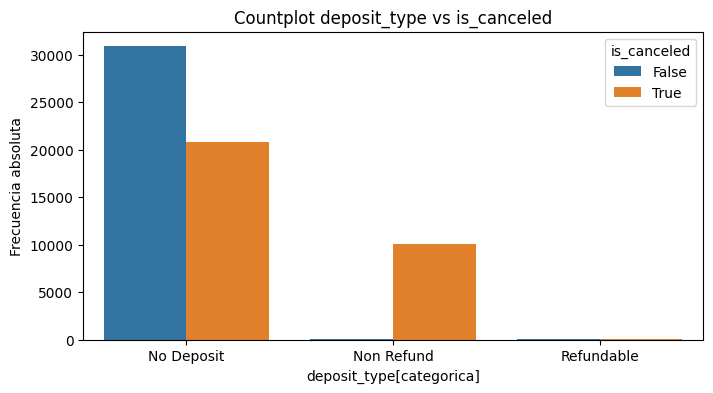

In [101]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='deposit_type', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('deposit_type[categorica]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot deposit_type vs is_canceled')
plt.show()

Aqui se puede apreciar que para el caso de tipo "Refundable",  tiene una muy baja frecuencia de aparicion, con lo cual no podemos sacar un patron claro. Mientras que para las observaciones "No deposit", paraceria que en estos casos es mas comun que no se produzcan cancelaciones, mientras que cuando es directamente "non refound" , sin devolucion siempre se producen cancelaciones) lo cual seria lo contrario de lo esperado.

Analizo agent contra is_canceled con un histograma

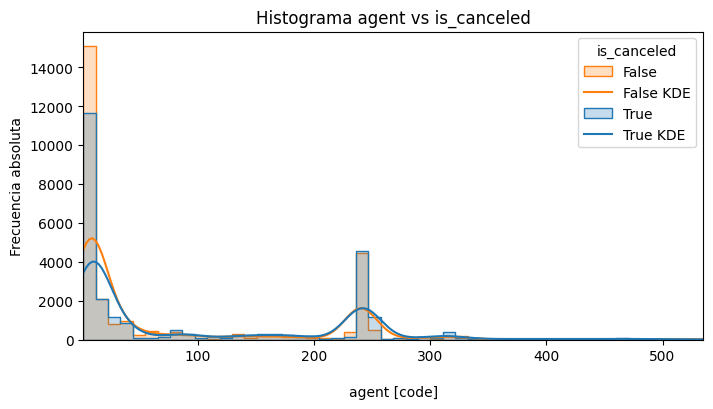

In [102]:
plt.figure(figsize=(8, 4))
sns.histplot(data=hotelsTrain, x='agent', hue='is_canceled', bins=50, kde=True, element="step")
plt.legend(title='is_canceled', labels=["False", "False KDE", "True", "True KDE"])
plt.xlim(hotelsTrain.agent.min(), hotelsTrain.agent.max())
plt.xlabel('\nagent [code]')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma agent vs is_canceled')
plt.show()

Analizo days_in_waiting_list contra is_canceled con un histograma

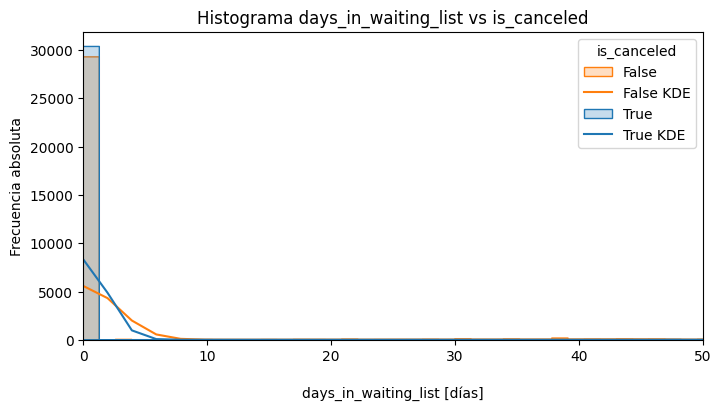

In [103]:
plt.figure(figsize=(8, 4))
sns.histplot(data=hotelsTrain, x='days_in_waiting_list', hue='is_canceled', bins=300, kde=True, element="step")
plt.legend(title='is_canceled', labels=["False", "False KDE", "True", "True KDE"])
plt.xlim(hotelsTrain.days_in_waiting_list.min(), hotelsTrain.days_in_waiting_list.max())
plt.xlabel('\ndays_in_waiting_list [días]')
plt.ylabel('Frecuencia absoluta')
plt.xlim(0, 50)
plt.title('Histograma days_in_waiting_list vs is_canceled')
plt.show()

Analizo customer_type contra is_canceled con un countplot

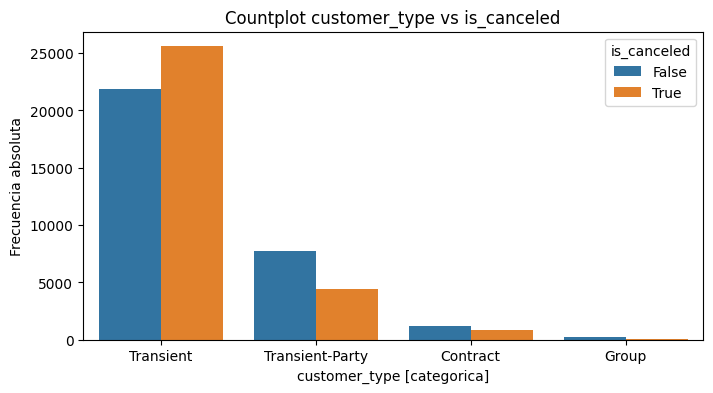

In [104]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='customer_type', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('customer_type [categorica]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot customer_type vs is_canceled')
plt.show()

Analizamos adr contra is_canceled con un histograma

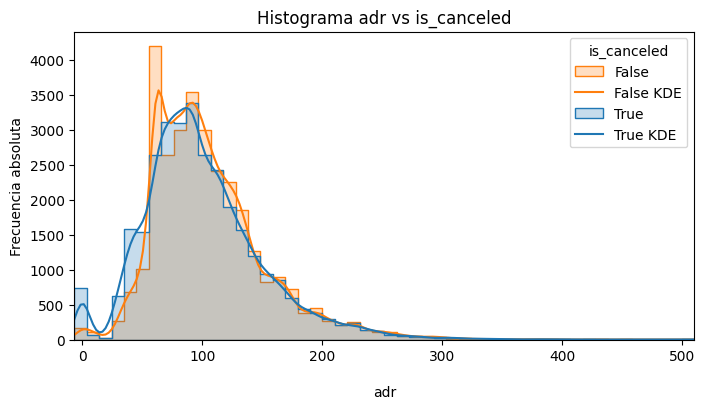

In [105]:
plt.figure(figsize=(8, 4))
sns.histplot(data=hotelsTrain, x='adr', hue='is_canceled', bins=50, kde=True, element="step")
plt.legend(title='is_canceled', labels=["False", "False KDE", "True", "True KDE"])
plt.xlim(hotelsTrain.adr.min(), hotelsTrain.adr.max())
plt.xlabel('\nadr')
plt.ylabel('Frecuencia absoluta')
plt.title('Histograma adr vs is_canceled')
plt.show()

Analizamos total_of_special_requests contra is_canceled con un countplot

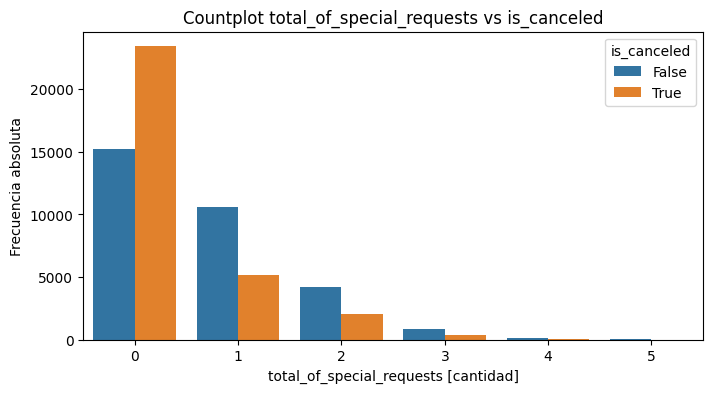

In [106]:
plt.figure(figsize=(8, 4))
sns.countplot(data=hotelsTrain, x='total_of_special_requests', hue='is_canceled')
plt.legend(title='is_canceled', labels=["False", "True"])
plt.xlabel('total_of_special_requests [cantidad]')
plt.ylabel('Frecuencia absoluta')
plt.title('Countplot total_of_special_requests vs is_canceled')
plt.show()

### Datos faltantes

Como se mencionó antes, no se considerará la variable company debido a no aportar mucha información

In [107]:
hotelsTrainFiltered = hotelsTrain.copy().drop(columns=["company"])

Encontramos dos categorías que tienen valores que indefinidos basándonos en la información del paper, que son distribution_channel y market_segment. Meal también tiene el valor undefined pero está considerado en el paper.

In [108]:
hotelsTrainFiltered.distribution_channel.value_counts()["Undefined"]

4

In [109]:
hotelsTrainFiltered.market_segment.value_counts()["Undefined"]

2

Eliminamos estas 6 líneas ya que en el total de la muestra no es una cantidad significativa

In [110]:
print(hotelsTrainFiltered.shape)

deleteUndefinedMask = hotelsTrainFiltered["market_segment"] == "Undefined" 
hotelsTrainFiltered = hotelsTrainFiltered[~deleteUndefinedMask]

deleteUndefinedMask = hotelsTrainFiltered["distribution_channel"] == "Undefined"
hotelsTrainFiltered = hotelsTrainFiltered[~deleteUndefinedMask]
hotelsTrainFiltered.shape

(61913, 30)


(61909, 30)

De las restantes variables sólo hay 3 que tienen datos faltantes, que son

In [111]:
nullsFiltered = hotelsTrainFiltered.get(["agent", "country", "children"]).isnull()

nullsStats = pd.DataFrame({"Cantidad de Nulos": nullsFiltered.sum(), "Porcentaje de nulos": round(nullsFiltered.mean() * 100, 2)})
nullsStats

,Cantidad de Nulos,Porcentaje de nulos
agent,7888,12.74
country,221,0.36
children,0,0.00


children quedó sin nulos cuando dropeamos los Undefined más arriba

Hacemos encoding de las variables categóricas:

In [112]:
varsToEncode = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel","reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "id"]
labelEncoders = {}

for varToEncode in varsToEncode:
    encoder = LabelEncoder()
    hotelsTrainFiltered[varToEncode] = encoder.fit_transform(hotelsTrainFiltered[varToEncode])
    labelEncoders[varToEncode] = encoder

Vamos a realizar una imputación de tipo MICE (Multivariate Imputation with Chain-Equation) con un estimador de regresión lineal bayesiana (BayesianRidge) para las variables agent y country dado que se puede rescatar información de ambas

In [113]:
imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, max_iter=10, verbose=0, random_state=0)

originalDtypes = hotelsTrainFiltered.dtypes
imputedAndFiltered = hotelsTrainFiltered.copy()

imputedAndFiltered = pd.DataFrame(imputer.fit_transform(imputedAndFiltered), columns=imputedAndFiltered.columns)

Ajustamos agent y country entre valores mínimos y máximos originales

In [114]:
imputedAndFiltered["agent"] = imputedAndFiltered["agent"].clip(lower=hotelsTrainFiltered.agent.min(), upper=hotelsTrainFiltered.agent.max())
imputedAndFiltered["country"] = imputedAndFiltered["country"].clip(lower=hotelsTrainFiltered.country.min(), upper=hotelsTrainFiltered.country.max())
imputedAndFiltered = imputedAndFiltered.astype(originalDtypes)

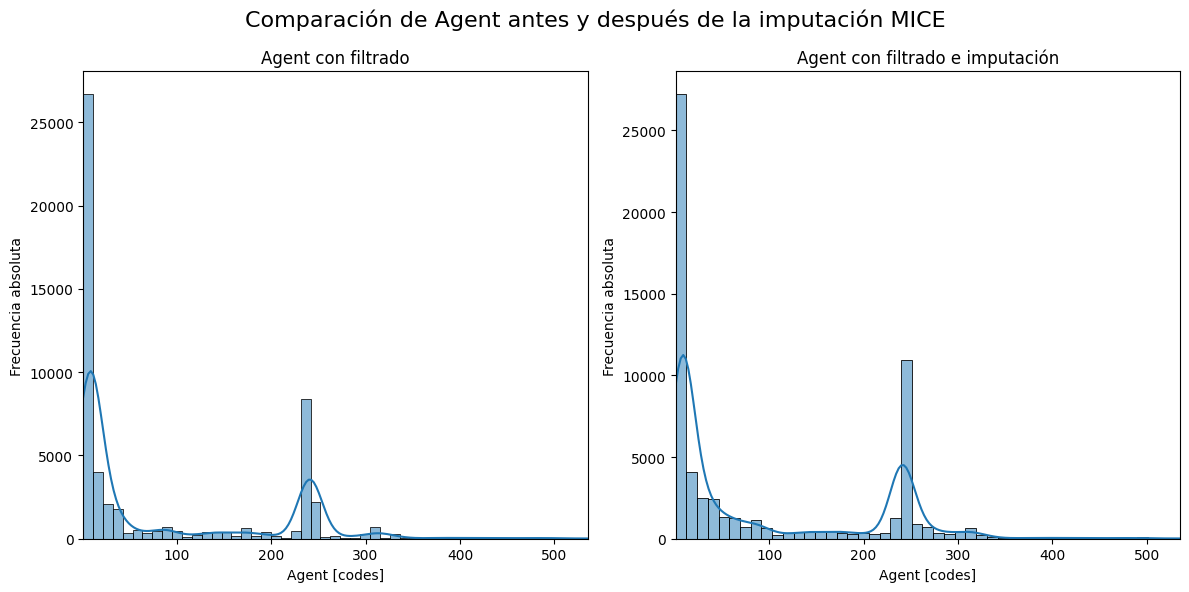

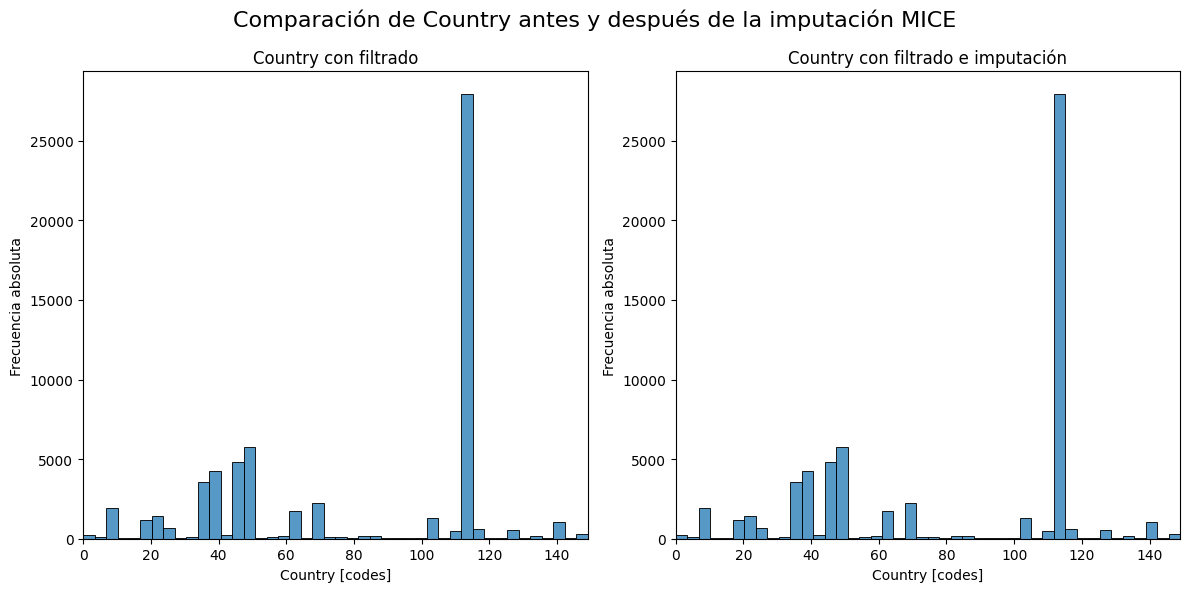

In [115]:
def drawAndCompareGraph(column, dfFiltered, dfImputedAndFiltered, kdeInput, xlabel):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.ylabel('Frecuencia absoluta')
    plt.xlabel(xlabel)
    sns.histplot(dfFiltered[column], kde=kdeInput)
    plt.xlim(dfFiltered[column].min(), dfFiltered[column].max())
    plt.title(f'{column.capitalize()} con filtrado')

    plt.subplot(1, 2, 2)
    plt.ylabel('Frecuencia absoluta')
    plt.xlabel(xlabel)
    sns.histplot(dfImputedAndFiltered[column], kde=kdeInput)
    plt.xlim(dfImputedAndFiltered[column].min(), dfImputedAndFiltered[column].max())
    plt.title(f'{column.capitalize()} con filtrado e imputación')

drawAndCompareGraph("agent", hotelsTrainFiltered, imputedAndFiltered, kdeInput=True, xlabel="Agent [codes]")
plt.suptitle('Comparación de Agent antes y después de la imputación MICE', fontsize=16)
plt.tight_layout()
plt.show()

drawAndCompareGraph("country", hotelsTrainFiltered, imputedAndFiltered, kdeInput=False, xlabel="Country [codes]")
plt.suptitle('Comparación de Country antes y después de la imputación MICE', fontsize=16)
plt.tight_layout()
plt.show()

Observamos que country prácticamente no modifica su distribución (dado que no habían muchos valores faltantes). Mientras que agent acentúa un poco los picos, es decir le asigna "generalmente más a reservas a los agentes que ya tenían más reservas" 

Hacemos re-encoding:

In [116]:
for varToEncode in varsToEncode:
    encoder = labelEncoders.get(varToEncode)
    imputedAndFiltered[varToEncode] = encoder.inverse_transform(imputedAndFiltered[varToEncode])

### Outliers

A fin de realizar el análisis de los valores atípicos "outliers", procedemos a identificar los potenciales casos utilizando el el diagrama "boxplot" y el conocimiento del dominio del problema.

Comenzamos con las primeras 10 variables, de las cuales 8 son cuantitativas

In [117]:
first8QuantList = dtypeAnalysisFirst10.loc[dtypeAnalysisFirst10["Tipo"] == "cuantitativa"].Variable
first8Quant = imputedAndFiltered.get(first8QuantList)

first8QuantList

1                    lead_time
2            arrival_date_year
4     arrival_date_week_number
5    arrival_date_day_of_month
6      stays_in_weekend_nights
7         stays_in_week_nights
8                       adults
9                     children
Name: Variable, dtype: object

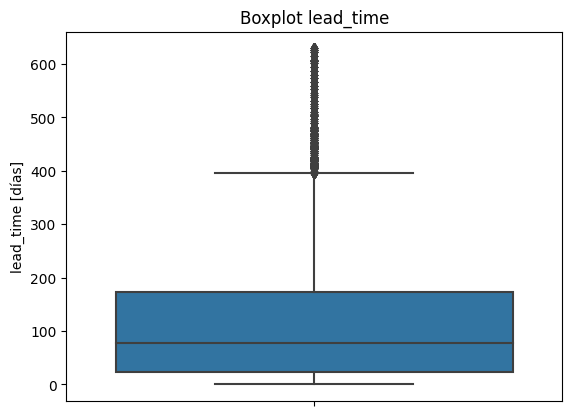

In [118]:
sns.boxplot(y='lead_time', data=first8Quant)
plt.title('Boxplot lead_time')
plt.ylabel('lead_time [días]')
plt.show()

La forma de lidiar con los outliers para lead_time será eliminándolos para tener un dataset mejor ajustado a los valores típicos

In [119]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "lead_time")

Boxplot resultante luego de la eliminación 

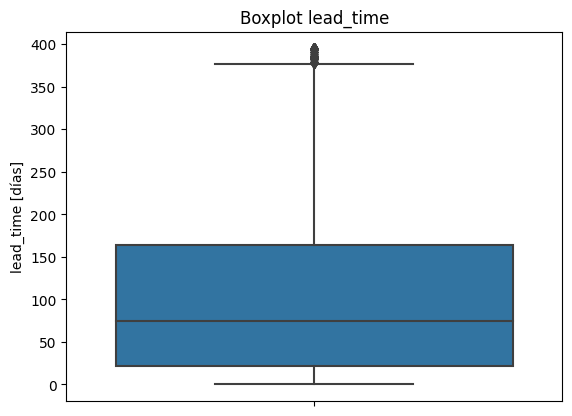

In [120]:
sns.boxplot(y='lead_time', data=hotelsWithoutOutliers)
plt.title('Boxplot lead_time')
plt.ylabel('lead_time [días]')
plt.show()

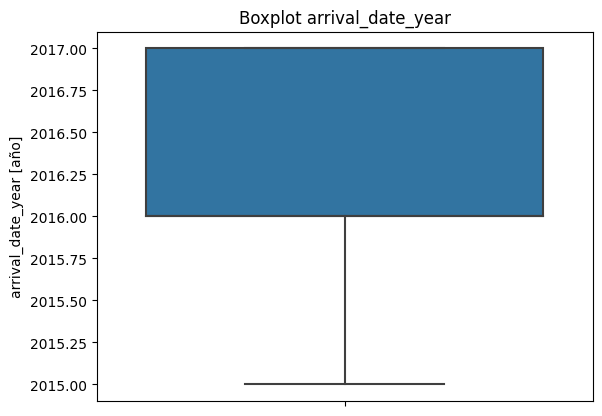

In [121]:
sns.boxplot(y='arrival_date_year', data=first8Quant)
plt.title('Boxplot arrival_date_year')
plt.ylabel('arrival_date_year [año]')
plt.show()

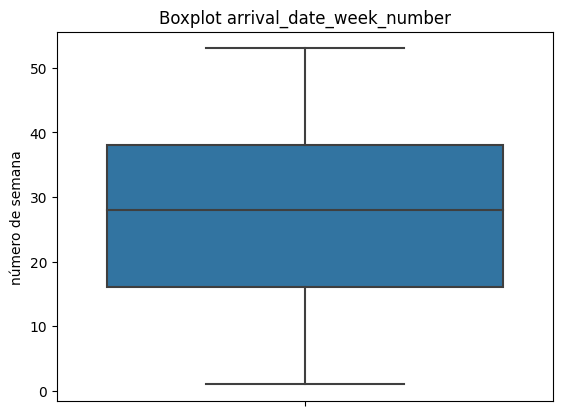

In [122]:
sns.boxplot(y='arrival_date_week_number', data=first8Quant)
plt.title('Boxplot arrival_date_week_number')
plt.ylabel('número de semana')
plt.show()

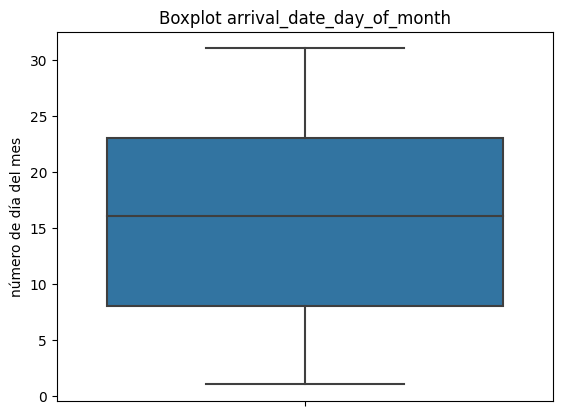

In [123]:
sns.boxplot(y='arrival_date_day_of_month', data=first8Quant)
plt.title('Boxplot arrival_date_day_of_month')
plt.ylabel('número de día del mes')
plt.show()

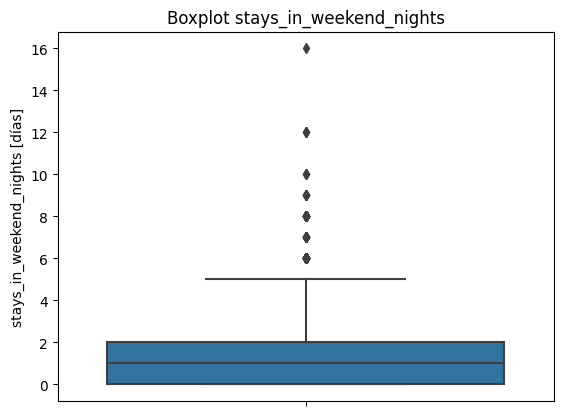

In [124]:
sns.boxplot(y='stays_in_weekend_nights', data=first8Quant)
plt.title('Boxplot stays_in_weekend_nights')
plt.ylabel('stays_in_weekend_nights [días]')
plt.show()

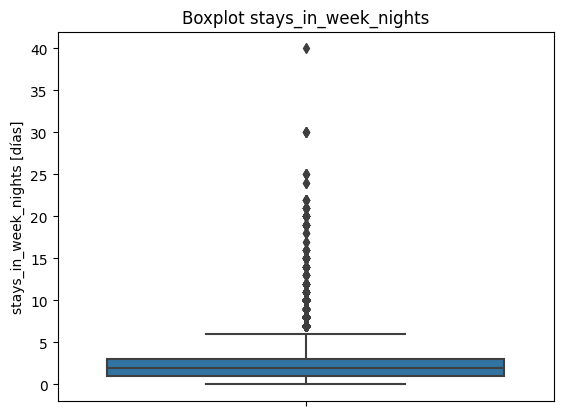

In [125]:
sns.boxplot(y='stays_in_week_nights', data=first8Quant)
plt.title('Boxplot stays_in_week_nights')
plt.ylabel('stays_in_week_nights [días]')
plt.show()

Análisis multivariable de stays_in_week_nights y stays_in_weekend_nights con distancia Mahalanobis

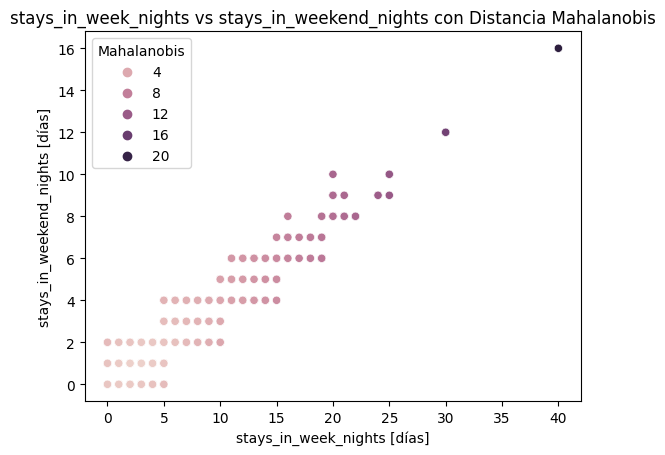

In [126]:
hotelsTrainSelected = imputedAndFiltered.copy().get(["stays_in_week_nights", "stays_in_weekend_nights"])
mean = np.mean(hotelsTrainSelected, axis=0)
cov = np.cov(hotelsTrainSelected.T)
mahalanobisDistances = [mahalanobis(x, mean, np.linalg.inv(cov)) for x in hotelsTrainSelected.values]

hotelsTrainSelected["mahalanobisDistances"] = mahalanobisDistances
sns.scatterplot(x="stays_in_week_nights", y="stays_in_weekend_nights", data=hotelsTrainSelected, hue="mahalanobisDistances")

plt.legend(title="Mahalanobis")
plt.xlabel('stays_in_week_nights [días]')
plt.ylabel('stays_in_weekend_nights [días]')
plt.title('stays_in_week_nights vs stays_in_weekend_nights con Distancia Mahalanobis')
plt.show()

Mediante una inspección visual, determinamos que un valor apto para determinar outliers usando la distancia de Mahalanobis sería una distancia de 12, procedemos a eliminarlos los outliers

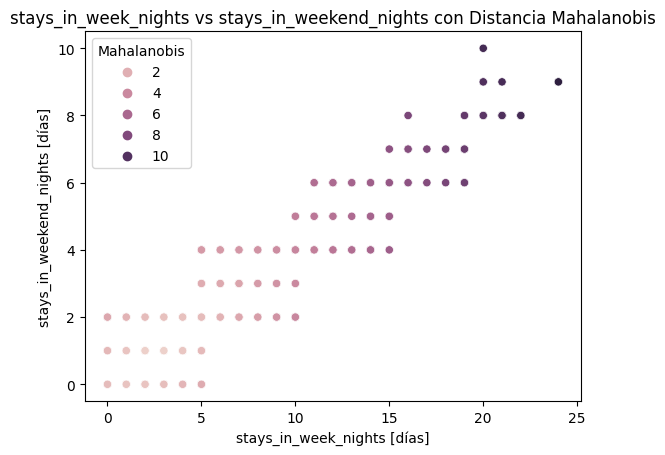

In [127]:
maxMahalanobisDistance = 12
hotelsTrainSelected = hotelsTrainSelected[hotelsTrainSelected["mahalanobisDistances"] <= maxMahalanobisDistance]

sns.scatterplot(x="stays_in_week_nights", y="stays_in_weekend_nights", data=hotelsTrainSelected, hue="mahalanobisDistances")
plt.legend(title="Mahalanobis")
plt.xlabel('stays_in_week_nights [días]')
plt.ylabel('stays_in_weekend_nights [días]')
plt.title('stays_in_week_nights vs stays_in_weekend_nights con Distancia Mahalanobis')
plt.show()

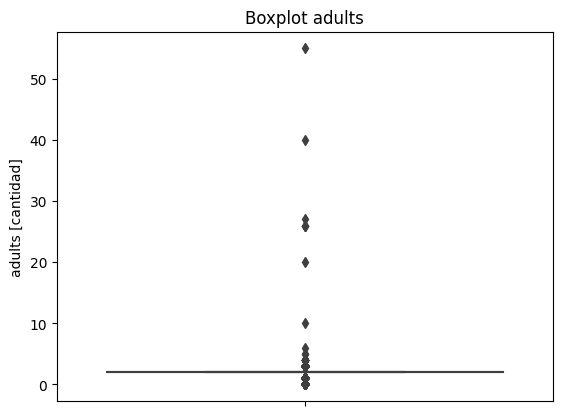

In [128]:
sns.boxplot(y='adults', data=first8Quant)
plt.title('Boxplot adults')
plt.ylabel('adults [cantidad]')
plt.show()

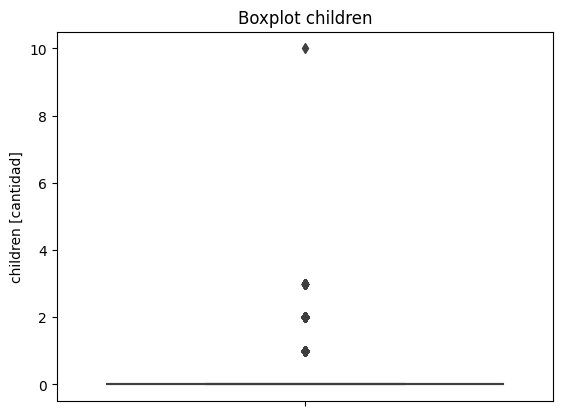

In [129]:
sns.boxplot(y='children', data=first8Quant)
plt.title('Boxplot children')
plt.ylabel('children [cantidad]')
plt.show()

Estudio los outliers de forma multivariada entre adults y children mediante el uso de la distancia de Mahalanobis

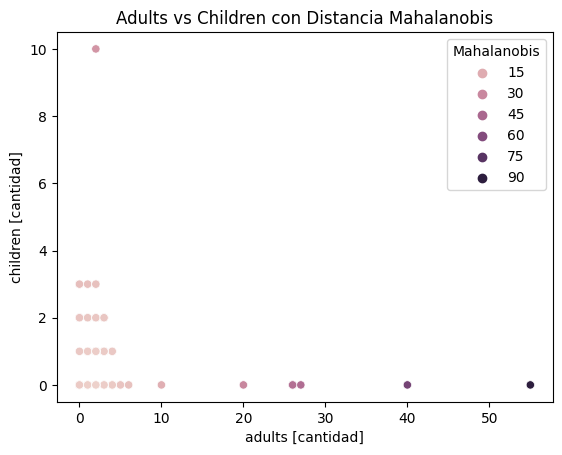

In [130]:
hotelsTrainSelected = imputedAndFiltered.copy().get(["adults", "children"])
mean = np.mean(hotelsTrainSelected, axis=0)
cov = np.cov(hotelsTrainSelected.T)
mahalanobisDistances = [mahalanobis(x, mean, np.linalg.inv(cov)) for x in hotelsTrainSelected.values]

hotelsTrainSelected["mahalanobisDistances"] = mahalanobisDistances
sns.scatterplot(x="adults", y="children", data=hotelsTrainSelected, hue="mahalanobisDistances")

plt.legend(title="Mahalanobis")
plt.xlabel('adults [cantidad]')
plt.ylabel('children [cantidad]')
plt.title('Adults vs Children con Distancia Mahalanobis')
plt.show()

Mediante una inspección visual, determinamos que un valor apto para determinar outliers usando la distancia de Mahalanobis sería una distancia de 20, procedemos a eliminarlos los outliers

<Axes: xlabel='adults', ylabel='children'>

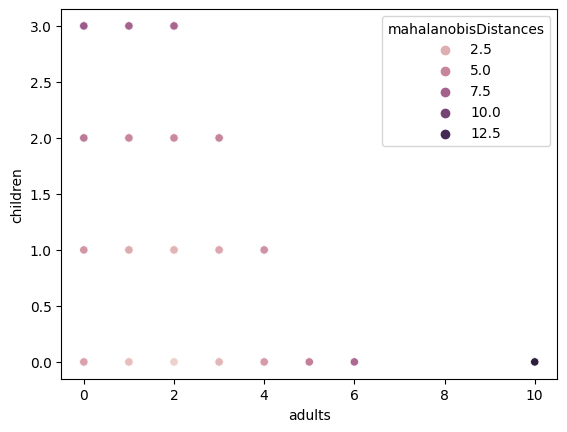

In [131]:
maxMahalanobisDistance = 20
hotelsTrainSelected = hotelsTrainSelected[hotelsTrainSelected["mahalanobisDistances"] <= maxMahalanobisDistance]

sns.scatterplot(x="adults", y="children", data=hotelsTrainSelected, hue="mahalanobisDistances")

Variables cuantitativas:

-Cantidad de bebes por reserva

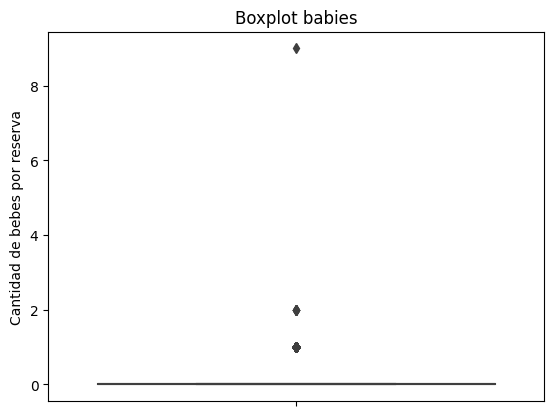

In [132]:
Segundas10Vars = imputedAndFiltered
sns.boxplot(y='babies', data=Segundas10Vars)
plt.title('Boxplot babies')
plt.ylabel('Cantidad de bebes por reserva')
plt.show()

Mediante la inspección visual determinamos que los únicos outliers serán los que tengan más de 8 bebés. A esos outliers los eliminamos

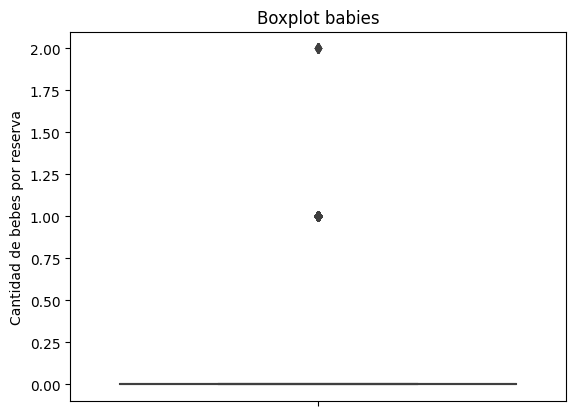

In [133]:
hotelsTrainSelected = imputedAndFiltered.copy()
hotelsTrainSelected = hotelsTrainSelected[hotelsTrainSelected["babies"] <= 8]

Segundas10Vars = hotelsTrainSelected
sns.boxplot(y='babies', data=Segundas10Vars)
plt.title('Boxplot babies')
plt.ylabel('Cantidad de bebes por reserva')
plt.show()

-Cantidad de cancelaciones previas

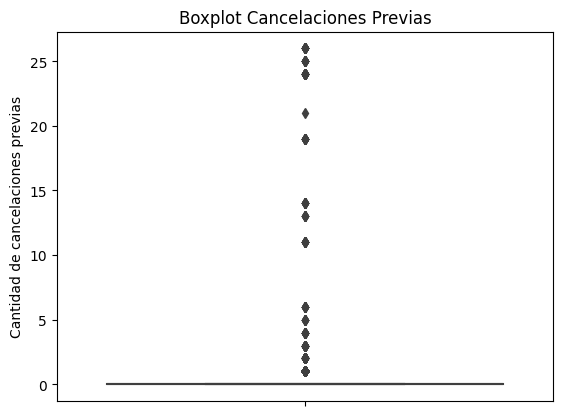

In [134]:
sns.boxplot(y='previous_cancellations', data=Segundas10Vars)
plt.title('Boxplot Cancelaciones Previas')
plt.ylabel('Cantidad de cancelaciones previas')
plt.show()

Tomamos la decisión de eliminar todos los outliers fuera de los "bigotes" del boxplot

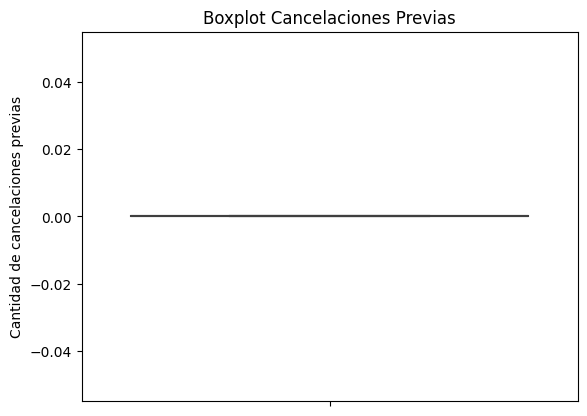

In [135]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "previous_cancellations")

sns.boxplot(y='previous_cancellations', data=hotelsWithoutOutliers)
plt.title('Boxplot Cancelaciones Previas')
plt.ylabel('Cantidad de cancelaciones previas')
plt.show()

-Cantidad de reservas previas

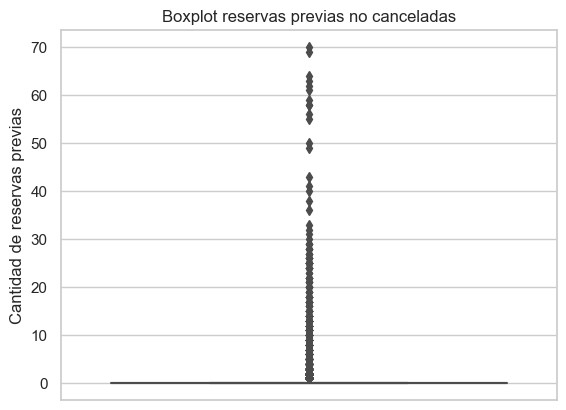

In [136]:
sns.set(style="whitegrid")  # Configura el estilo del gráfico

# Crea el boxplot
sns.boxplot(y='previous_bookings_not_canceled', data=Segundas10Vars)

# Añade etiquetas al gráfico
plt.title('Boxplot reservas previas no canceladas')
plt.ylabel('Cantidad de reservas previas')

# Muestra el gráfico
plt.show()

Tomamos la decisión de eliminar todos los outliers fuera de los "bigotes" del boxplot

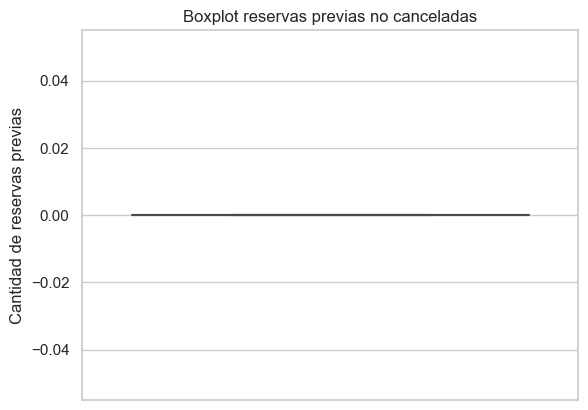

In [137]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "previous_bookings_not_canceled")

sns.boxplot(y='previous_bookings_not_canceled', data=hotelsWithoutOutliers)
plt.title('Boxplot reservas previas no canceladas')
plt.ylabel('Cantidad de reservas previas')
plt.show()

-Cantidad de cambios en la reserva.

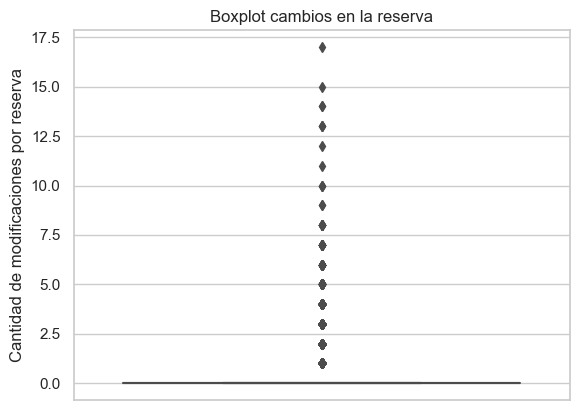

In [138]:

sns.boxplot(y='booking_changes', data=Segundas10Vars)
plt.title('Boxplot cambios en la reserva')
plt.ylabel('Cantidad de modificaciones por reserva')
plt.show()

Tomamos la decisión de eliminar todos los outliers fuera de los "bigotes" del boxplot

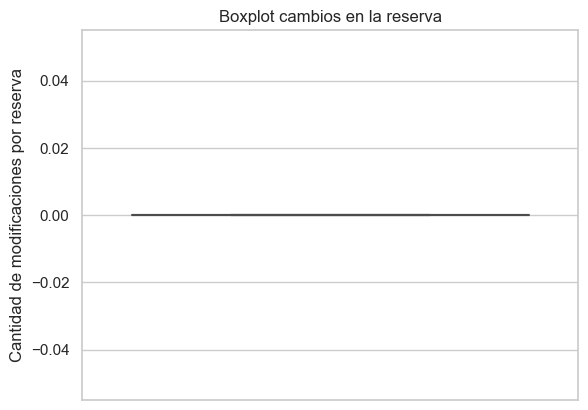

In [139]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "booking_changes")

sns.boxplot(y='booking_changes', data=hotelsWithoutOutliers)
plt.title('Boxplot cambios en la reserva')
plt.ylabel('Cantidad de modificaciones por reserva')
plt.show()

Comenzamos con las ultimas 10 variables, de las cuales 3 son cuantitativas

In [140]:
last3QuantList = dtypeAnalysisLast10.loc[dtypeAnalysisLast10["Tipo"] == "cuantitativa"].Variable
last3Quant = imputedAndFiltered.get(last3QuantList)

last3QuantList

14         days_in_waiting_list
16                          adr
18    total_of_special_requests
Name: Variable, dtype: object

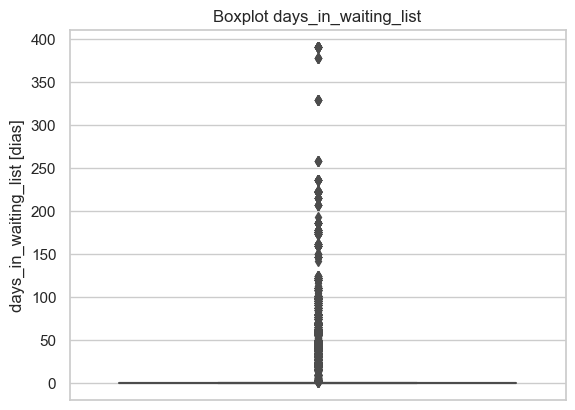

In [141]:
sns.boxplot(y='days_in_waiting_list', data=last3Quant)
plt.title('Boxplot days_in_waiting_list')
plt.ylabel('days_in_waiting_list [dias]')
plt.show()

Tomamos la decisión de eliminar todos los outliers fuera de los "bigotes" del boxplot

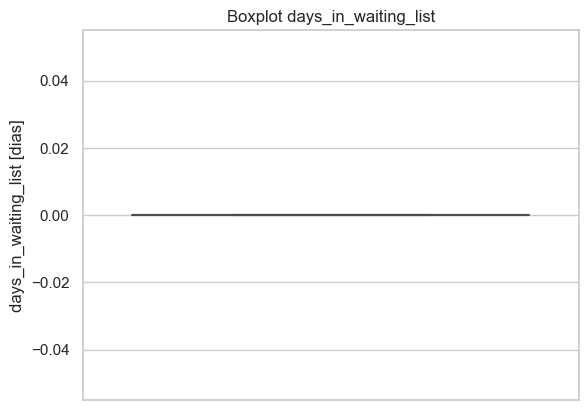

In [142]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "days_in_waiting_list")

sns.boxplot(y='days_in_waiting_list', data=hotelsWithoutOutliers)
plt.title('Boxplot days_in_waiting_list')
plt.ylabel('days_in_waiting_list [dias]')
plt.show()

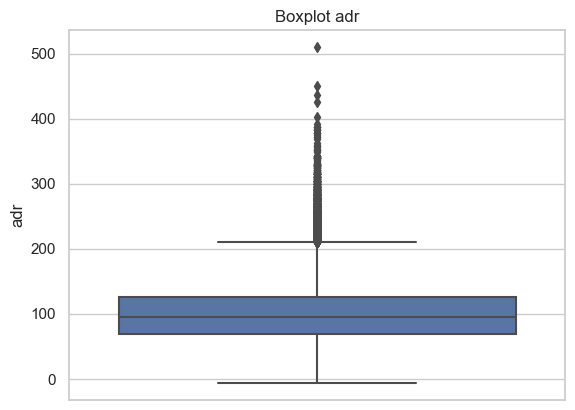

In [143]:
sns.boxplot(y='adr', data=last3Quant)
plt.title('Boxplot adr')
plt.ylabel('adr')
plt.show()

Tomamos la decisión de eliminar todos los outliers fuera de los "bigotes" del boxplot

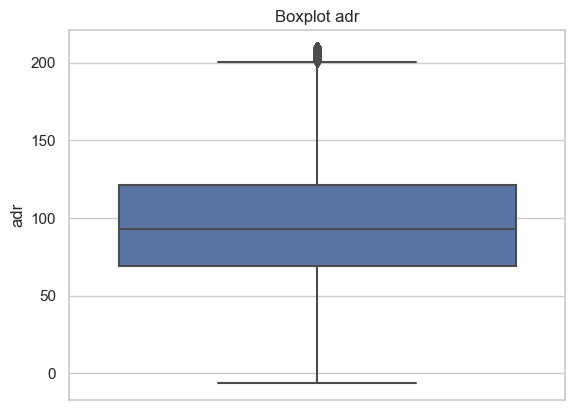

In [144]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "adr")

sns.boxplot(y='adr', data=hotelsWithoutOutliers)
plt.title('Boxplot adr')
plt.ylabel('adr')
plt.show()

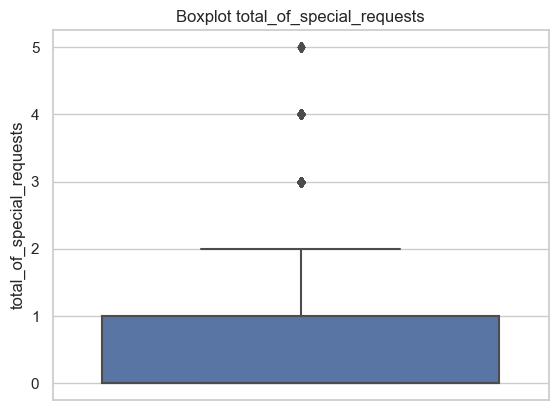

In [145]:
sns.boxplot(y='total_of_special_requests', data=last3Quant)
plt.title('Boxplot total_of_special_requests')
plt.ylabel('total_of_special_requests')
plt.show()

Tomamos la decisión de eliminar todos los outliers fuera de los "bigotes" del boxplot

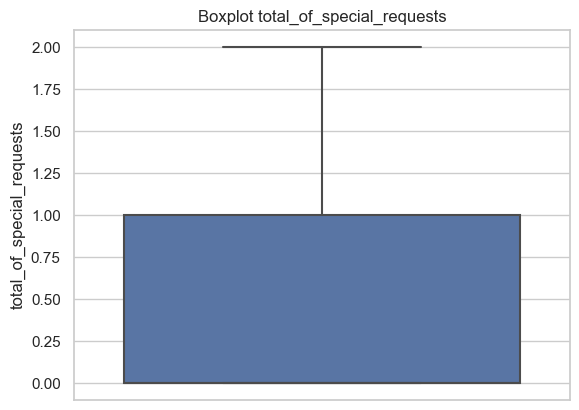

In [146]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "total_of_special_requests")

sns.boxplot(y='total_of_special_requests', data=hotelsWithoutOutliers)
plt.title('Boxplot total_of_special_requests')
plt.ylabel('total_of_special_requests')
plt.show()

### Resumen de cambios al dataset

In [147]:
hotelsTrain.shape

(61913, 31)

Como resumen de los cambios del dataset, se tiene:

- La remoción de la columna company y la imputación de datos nulos explicada en la parte de Datos Faltantes

In [148]:
imputedAndFiltered.shape

(61909, 30)

- La remoción de datos debido a presencia de outliers, se aplican todos estos cambios a un dataset:

In [149]:
hotelsTrainSelected = imputedAndFiltered.copy().get(["stays_in_week_nights", "stays_in_weekend_nights"])
mean = np.mean(hotelsTrainSelected, axis=0)
cov = np.cov(hotelsTrainSelected.T)
mahalanobisDistances = [mahalanobis(x, mean, np.linalg.inv(cov)) for x in hotelsTrainSelected.values]

hotelsTrainSelected["mahalanobisDistancesStaysDays"] = mahalanobisDistances

maxMahalanobisDistance = 12
hotelsTrainSelected = hotelsTrainSelected[hotelsTrainSelected["mahalanobisDistancesStaysDays"] > maxMahalanobisDistance]

print("Filas adicionales para ser removidas", hotelsTrainSelected.shape)

Filas adicionales para ser removidas (7, 3)


In [150]:
hotelsTrainSelected = imputedAndFiltered.copy().get(["adults", "children"])
mean = np.mean(hotelsTrainSelected, axis=0)
cov = np.cov(hotelsTrainSelected.T)
mahalanobisDistances = [mahalanobis(x, mean, np.linalg.inv(cov)) for x in hotelsTrainSelected.values]

hotelsTrainSelected["mahalanobisDistancesAdultsChildren"] = mahalanobisDistances

maxMahalanobisDistance = 20
hotelsTrainSelected = hotelsTrainSelected[hotelsTrainSelected["mahalanobisDistancesAdultsChildren"] > maxMahalanobisDistance]

print("Filas adicionales para ser removidas", hotelsTrainSelected.shape)

Filas adicionales para ser removidas (8, 3)


In [151]:
hotelsWithoutOutliers = imputedAndFiltered.copy()

def removeOutliers(data, column):
    maxTolerance = 1.5
    firstQuantile = data[column].quantile(0.25)
    thirdQuantile = data[column].quantile(0.75)

    interquantileRange = thirdQuantile - firstQuantile
    lowBarrier = firstQuantile - maxTolerance * interquantileRange
    upBarrier = thirdQuantile + maxTolerance * interquantileRange

    return data[(data[column] >= lowBarrier) & (data[column] <= upBarrier)]

hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "lead_time")
hotelsWithoutOutliers = hotelsWithoutOutliers[hotelsWithoutOutliers["babies"] <= 8]
hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "previous_cancellations")
hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "previous_bookings_not_canceled")
hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "booking_changes")
hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "days_in_waiting_list")
hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "adr")
hotelsWithoutOutliers = removeOutliers(hotelsWithoutOutliers, "total_of_special_requests")

hotelsWithoutOutliers.shape

(43392, 30)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1aa3806f-818c-491b-b989-c7edda3cd70d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>